# Prerequisites for running notebook

In [1]:
!pip install kora -q
!pip install numpy==1.21
!pip install explainerdashboard

     |████████████████████████████████| 57 kB 1.5 MB/s 
     |████████████████████████████████| 59 kB 3.2 MB/s 
     |████████████████████████████████| 15.7 MB 325 kB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.8.0+zzzcolab20220506162203 requires tf-estimator-nightly==2.8.0.dev2021122109, which is not installed.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


     |████████████████████████████████| 305 kB 3.9 MB/s 
     |████████████████████████████████| 9.8 MB 9.7 MB/s 
     |████████████████████████████████| 46 kB 3.2 MB/s 
     |████████████████████████████████| 57 kB 3.4 MB/s 
     |████████████████████████████████| 61 kB 134 kB/s 
     |████████████████████████████████| 564 kB 36.7 MB/s 
     |████████████████████████████████| 470 kB 40.3 MB/s 
     |████████████████████████████████| 197 kB 40.1 MB/s 
     |████████████████████████████████| 64 kB 2.0 MB/s 
     |████████████████████████████████| 357 kB 45.7 MB/s 
     |████████████████████████████████| 136 kB 53.7 MB/s 
  Created wheel for dtreeviz: filename=dtreeviz-1.3.6-py3-none-any.whl size=67326 sha256=4222463f6294a310df3f9488e571d908e35578b29d5607110aedee6ce801dde8
  Stored in directory: /root/.cache/pip/wheels/33/76/fe/99227ff871766e7284bb88d3d28e2f4886b8ec04d669033478
  Created wheel for dash-auth: filename=dash_auth-1.4.1-py3-none-any.whl size=476152 sha256=4b2efaaaa0e3ae6742e

In [2]:
##Standard imports for project
import pandas as pd
import numpy as np
from datetime import datetime

#Functions for use
from sklearn.base import clone
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

#models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

#Evaluation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, StratifiedKFold, KFold
from sklearn.metrics import mean_absolute_error, accuracy_score

#Feature selection
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV

#Hyperparameter optimization
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from explainerdashboard import RegressionExplainer, ExplainerDashboard, ExplainerHub


The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`

The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`


# Required execution for notebook

The below verifies if the notebook is being executed in a local environment (Anaconda) or if the notebook is being hosted (Google Drive), and sets certain variables based on the requirement ("cwd" being the reference of the project directory; the notebook is always assumed to be executed at the root or the highest level of the project folder)

In [3]:
#Red pill or blue pill

import os

is_drive = False
cwd = os.path.abspath(os.path.join(os.getcwd(), os.pardir)) + "/Datasets/"

while True:
  offon = input("Is this being run offline? (Y = offline (i.e. Jupyter notebook), N = online (i.e. Google Colab notebook)): ")
  try:
    if offon.lower() not in ["y", "n"]:
      raise ValueError
    else:
      if offon.lower() == "n":
        from google.colab import drive
        from kora import drive as drives
        drive.mount('/content/drive')
        is_drive = True
        cwd = str(drives.chdir_notebook())
        cwd = os.path.abspath(os.path.join(os.getcwd(), os.pardir)) + "/Datasets/"
      break
  except ValueError:
    print("Error! Please only type one of the following: Y, y, N, n")

Is this being run offline? (Y = offline (i.e. Jupyter notebook), N = online (i.e. Google Colab notebook)): n
Mounted at /content/drive


In [4]:
# Alternative filepath for offline executions that don't have google python
#' modules installed

import os
cwd = os.path.abspath(os.path.join(os.getcwd(), os.pardir)) + "/Datasets/"

# Import datasets

In [5]:
df2 = pd.read_csv(cwd+"milk dataset 2.csv")
dfn = pd.read_csv(cwd+"netherlands dataset output.csv")

## Dataframe descriptions

In [6]:
df2

,Unnamed: 0,Year,Month,Raw milk price,Butter,Cheese,Domestic milk intake,Fat content (Percent),Heifers 200-249kg,Heifers 250-299kg,Heifers 300-349kg,Heifers 350-399kg,Heifers 400-449kg,Skimmed milk sales,Skimmed milk powder,Whole milk sales,Imported milk intake
0,0,2002.0,1.0,28.39,2.3,1.2,117.3,3.82,274.71,325.25,390.32,467.19,559.87,9.9,3.1000,36.1,16.8
1,1,2002.0,2.0,27.35,3.8,1.7,165.2,3.77,286.94,328.66,398.31,522.77,576.65,9.3,2.9000,32.9,21.9
2,2,2002.0,3.0,25.99,9.8,5.2,337.5,3.73,283.65,332.73,437.81,519.85,566.68,10.1,5.3000,34.6,29.2
3,3,2002.0,4.0,25.47,16.6,13.7,596.4,3.60,279.94,380.13,455.14,510.17,589.39,10.0,8.9000,34.7,31.2
4,4,2002.0,5.0,25.57,20.1,14.8,709.0,3.59,310.74,388.89,440.45,528.76,569.65,10.3,11.8000,35.9,31.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,235,2021.0,8.0,39.23,28.8,29.3,917.4,4.19,480.00,598.07,689.20,801.61,913.59,15.8,16.4000,29.0,0.0
236,236,2021.0,9.0,42.44,26.5,33.2,776.7,4.43,450.74,570.54,694.88,804.71,915.68,15.1,11.1000,26.6,0.0
237,237,2021.0,10.0,46.52,21.6,27.5,652.8,4.77,516.00,529.67,656.53,777.37,890.95,15.8,5.5000,26.1,0.0
238,238,2021.0,11.0,48.65,17.8,20.9,460.6,4.90,419.66,547.42,641.39,762.83,888.34,15.4,5.2625,25.5,0.0


In [7]:
dfn

,Unnamed: 0,Year,Month,Volume,Fat content,Butter,Cheese,Skimmed milk powder,Concentrated milk,Raw milk value
0,0,2002,4,857.265886,4.53,12.02,53.17,6.52,22.46,33.49
1,1,2002,8,848.127233,4.15,8.12,53.05,4.23,22.73,32.99
2,2,2002,12,869.123799,4.62,11.06,55.78,6.32,24.14,31.04
3,3,2002,2,753.438743,4.54,10.28,46.14,6.42,23.13,30.42
4,4,2002,1,863.296814,4.64,11.91,54.34,7.23,21.94,30.25
...,...,...,...,...,...,...,...,...,...,...
235,235,2021,3,1179.556371,4.57,13.38,84.30,7.21,31.27,37.75
236,236,2021,5,1178.274435,4.41,11.66,83.84,10.11,33.34,38.00
237,237,2021,11,1029.045374,4.53,9.58,75.36,8.46,31.66,39.50
238,238,2021,10,1056.160273,4.47,11.24,77.56,5.55,31.83,41.25


## Processing the data

### Remove unnecessary columns

In [8]:
df2 = df2[df2.columns[1:]]
dfn = dfn[dfn.columns[1:]]

In [9]:
df2

,Year,Month,Raw milk price,Butter,Cheese,Domestic milk intake,Fat content (Percent),Heifers 200-249kg,Heifers 250-299kg,Heifers 300-349kg,Heifers 350-399kg,Heifers 400-449kg,Skimmed milk sales,Skimmed milk powder,Whole milk sales,Imported milk intake
0,2002.0,1.0,28.39,2.3,1.2,117.3,3.82,274.71,325.25,390.32,467.19,559.87,9.9,3.1000,36.1,16.8
1,2002.0,2.0,27.35,3.8,1.7,165.2,3.77,286.94,328.66,398.31,522.77,576.65,9.3,2.9000,32.9,21.9
2,2002.0,3.0,25.99,9.8,5.2,337.5,3.73,283.65,332.73,437.81,519.85,566.68,10.1,5.3000,34.6,29.2
3,2002.0,4.0,25.47,16.6,13.7,596.4,3.60,279.94,380.13,455.14,510.17,589.39,10.0,8.9000,34.7,31.2
4,2002.0,5.0,25.57,20.1,14.8,709.0,3.59,310.74,388.89,440.45,528.76,569.65,10.3,11.8000,35.9,31.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,2021.0,8.0,39.23,28.8,29.3,917.4,4.19,480.00,598.07,689.20,801.61,913.59,15.8,16.4000,29.0,0.0
236,2021.0,9.0,42.44,26.5,33.2,776.7,4.43,450.74,570.54,694.88,804.71,915.68,15.1,11.1000,26.6,0.0
237,2021.0,10.0,46.52,21.6,27.5,652.8,4.77,516.00,529.67,656.53,777.37,890.95,15.8,5.5000,26.1,0.0
238,2021.0,11.0,48.65,17.8,20.9,460.6,4.90,419.66,547.42,641.39,762.83,888.34,15.4,5.2625,25.5,0.0


### Translate name of mismatched columns

In [10]:
df2 = df2.rename({"Fat content (Percent)": "Fat content"}, axis=1)

In [11]:
dfn

,Year,Month,Volume,Fat content,Butter,Cheese,Skimmed milk powder,Concentrated milk,Raw milk value
0,2002,4,857.265886,4.53,12.02,53.17,6.52,22.46,33.49
1,2002,8,848.127233,4.15,8.12,53.05,4.23,22.73,32.99
2,2002,12,869.123799,4.62,11.06,55.78,6.32,24.14,31.04
3,2002,2,753.438743,4.54,10.28,46.14,6.42,23.13,30.42
4,2002,1,863.296814,4.64,11.91,54.34,7.23,21.94,30.25
...,...,...,...,...,...,...,...,...,...
235,2021,3,1179.556371,4.57,13.38,84.30,7.21,31.27,37.75
236,2021,5,1178.274435,4.41,11.66,83.84,10.11,33.34,38.00
237,2021,11,1029.045374,4.53,9.58,75.36,8.46,31.66,39.50
238,2021,10,1056.160273,4.47,11.24,77.56,5.55,31.83,41.25


### Add new features to dataset

In [12]:
df2["Volume"] = [x+y for (x,y) in zip(df2["Domestic milk intake"],
                                                     df2["Imported milk intake"])]

In [13]:
df2["Concentrated milk"] = [x+y for (x,y) in zip(df2["Whole milk sales"],
                                                 df2["Skimmed milk sales"])]

In [14]:
df2["Volume"]

0      134.1
1      187.1
2      366.7
3      627.6
4      740.6
       ...  
235    917.4
236    776.7
237    652.8
238    460.6
239    256.3
Name: Volume, Length: 240, dtype: float64

In [15]:
df2

,Year,Month,Raw milk price,Butter,Cheese,Domestic milk intake,Fat content,Heifers 200-249kg,Heifers 250-299kg,Heifers 300-349kg,Heifers 350-399kg,Heifers 400-449kg,Skimmed milk sales,Skimmed milk powder,Whole milk sales,Imported milk intake,Volume,Concentrated milk
0,2002.0,1.0,28.39,2.3,1.2,117.3,3.82,274.71,325.25,390.32,467.19,559.87,9.9,3.1000,36.1,16.8,134.1,46.0
1,2002.0,2.0,27.35,3.8,1.7,165.2,3.77,286.94,328.66,398.31,522.77,576.65,9.3,2.9000,32.9,21.9,187.1,42.2
2,2002.0,3.0,25.99,9.8,5.2,337.5,3.73,283.65,332.73,437.81,519.85,566.68,10.1,5.3000,34.6,29.2,366.7,44.7
3,2002.0,4.0,25.47,16.6,13.7,596.4,3.60,279.94,380.13,455.14,510.17,589.39,10.0,8.9000,34.7,31.2,627.6,44.7
4,2002.0,5.0,25.57,20.1,14.8,709.0,3.59,310.74,388.89,440.45,528.76,569.65,10.3,11.8000,35.9,31.6,740.6,46.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,2021.0,8.0,39.23,28.8,29.3,917.4,4.19,480.00,598.07,689.20,801.61,913.59,15.8,16.4000,29.0,0.0,917.4,44.8
236,2021.0,9.0,42.44,26.5,33.2,776.7,4.43,450.74,570.54,694.88,804.71,915.68,15.1,11.1000,26.6,0.0,776.7,41.7
237,2021.0,10.0,46.52,21.6,27.5,652.8,4.77,516.00,529.67,656.53,777.37,890.95,15.8,5.5000,26.1,0.0,652.8,41.9
238,2021.0,11.0,48.65,17.8,20.9,460.6,4.90,419.66,547.42,641.39,762.83,888.34,15.4,5.2625,25.5,0.0,460.6,40.9


### Renamed mismatched column in Netherlands dataset

In [16]:
dfn = dfn.rename({dfn.columns[-1]:df2.columns[2]}, axis=1)

In [17]:
dfn

,Year,Month,Volume,Fat content,Butter,Cheese,Skimmed milk powder,Concentrated milk,Raw milk price
0,2002,4,857.265886,4.53,12.02,53.17,6.52,22.46,33.49
1,2002,8,848.127233,4.15,8.12,53.05,4.23,22.73,32.99
2,2002,12,869.123799,4.62,11.06,55.78,6.32,24.14,31.04
3,2002,2,753.438743,4.54,10.28,46.14,6.42,23.13,30.42
4,2002,1,863.296814,4.64,11.91,54.34,7.23,21.94,30.25
...,...,...,...,...,...,...,...,...,...
235,2021,3,1179.556371,4.57,13.38,84.30,7.21,31.27,37.75
236,2021,5,1178.274435,4.41,11.66,83.84,10.11,33.34,38.00
237,2021,11,1029.045374,4.53,9.58,75.36,8.46,31.66,39.50
238,2021,10,1056.160273,4.47,11.24,77.56,5.55,31.83,41.25


### Target value

Cost of raw milk

# Tests

## Test 1 (on df2)

### Set up Train/Test data

In [ ]:
df2

,Year,Month,Raw milk price,Butter,Cheese,Domestic milk intake,Fat content,Heifers 200-249kg,Heifers 250-299kg,Heifers 300-349kg,Heifers 350-399kg,Heifers 400-449kg,Skimmed milk sales,Skimmed milk powder,Whole milk sales,Imported milk intake,Volume,Concentrated milk
0,2002.0,1.0,28.39,2.3,1.2,117.3,3.82,274.71,325.25,390.32,467.19,559.87,9.9,3.1000,36.1,16.8,134.1,46.0
1,2002.0,2.0,27.35,3.8,1.7,165.2,3.77,286.94,328.66,398.31,522.77,576.65,9.3,2.9000,32.9,21.9,187.1,42.2
2,2002.0,3.0,25.99,9.8,5.2,337.5,3.73,283.65,332.73,437.81,519.85,566.68,10.1,5.3000,34.6,29.2,366.7,44.7
3,2002.0,4.0,25.47,16.6,13.7,596.4,3.60,279.94,380.13,455.14,510.17,589.39,10.0,8.9000,34.7,31.2,627.6,44.7
4,2002.0,5.0,25.57,20.1,14.8,709.0,3.59,310.74,388.89,440.45,528.76,569.65,10.3,11.8000,35.9,31.6,740.6,46.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,2021.0,8.0,39.23,28.8,29.3,917.4,4.19,480.00,598.07,689.20,801.61,913.59,15.8,16.4000,29.0,0.0,917.4,44.8
236,2021.0,9.0,42.44,26.5,33.2,776.7,4.43,450.74,570.54,694.88,804.71,915.68,15.1,11.1000,26.6,0.0,776.7,41.7
237,2021.0,10.0,46.52,21.6,27.5,652.8,4.77,516.00,529.67,656.53,777.37,890.95,15.8,5.5000,26.1,0.0,652.8,41.9
238,2021.0,11.0,48.65,17.8,20.9,460.6,4.90,419.66,547.42,641.39,762.83,888.34,15.4,5.2625,25.5,0.0,460.6,40.9


In [ ]:
X2 = df2[["Month"]+(list(df2.columns[3:-1]))]
y2 = df2["Raw milk price"]

stratify2 = df2["Month"]

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, random_state=22122,
                                                        stratify=stratify2)

In [ ]:
X2

,Month,Butter,Cheese,Domestic milk intake,Fat content,Heifers 200-249kg,Heifers 250-299kg,Heifers 300-349kg,Heifers 350-399kg,Heifers 400-449kg,Skimmed milk sales,Skimmed milk powder,Whole milk sales,Imported milk intake,Volume
0,1.0,2.3,1.2,117.3,3.82,274.71,325.25,390.32,467.19,559.87,9.9,3.1000,36.1,16.8,134.1
1,2.0,3.8,1.7,165.2,3.77,286.94,328.66,398.31,522.77,576.65,9.3,2.9000,32.9,21.9,187.1
2,3.0,9.8,5.2,337.5,3.73,283.65,332.73,437.81,519.85,566.68,10.1,5.3000,34.6,29.2,366.7
3,4.0,16.6,13.7,596.4,3.60,279.94,380.13,455.14,510.17,589.39,10.0,8.9000,34.7,31.2,627.6
4,5.0,20.1,14.8,709.0,3.59,310.74,388.89,440.45,528.76,569.65,10.3,11.8000,35.9,31.6,740.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,8.0,28.8,29.3,917.4,4.19,480.00,598.07,689.20,801.61,913.59,15.8,16.4000,29.0,0.0,917.4
236,9.0,26.5,33.2,776.7,4.43,450.74,570.54,694.88,804.71,915.68,15.1,11.1000,26.6,0.0,776.7
237,10.0,21.6,27.5,652.8,4.77,516.00,529.67,656.53,777.37,890.95,15.8,5.5000,26.1,0.0,652.8
238,11.0,17.8,20.9,460.6,4.90,419.66,547.42,641.39,762.83,888.34,15.4,5.2625,25.5,0.0,460.6


In [ ]:
X2_train

,Month,Butter,Cheese,Domestic milk intake,Fat content,Heifers 200-249kg,Heifers 250-299kg,Heifers 300-349kg,Heifers 350-399kg,Heifers 400-449kg,Skimmed milk sales,Skimmed milk powder,Whole milk sales,Imported milk intake,Volume
41,6.0,17.6,18.6,640.6,3.61,367.57,445.64,514.63,590.18,635.17,11.1,9.00000,32.2,43.9,684.5
144,1.0,4.4,2.3,132.0,4.11,498.38,597.40,704.50,789.13,867.04,16.9,3.78875,23.5,38.8,170.8
124,5.0,21.0,24.8,734.9,3.75,568.21,674.82,771.91,864.44,975.71,15.8,9.20000,25.3,42.3,777.2
200,9.0,22.5,26.9,721.8,4.35,362.92,462.06,545.86,667.49,825.15,17.4,11.50000,26.4,58.6,780.4
207,4.0,28.4,27.7,953.3,3.94,422.53,532.32,646.67,772.88,893.58,16.8,21.40000,28.5,56.9,1010.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38,3.0,12.8,9.4,327.4,3.80,333.81,368.56,483.17,574.57,663.11,11.7,2.60000,33.8,50.2,377.6
89,6.0,15.6,23.5,617.5,3.65,319.82,411.62,490.06,582.91,661.43,13.3,10.20000,27.3,0.0,617.5
204,1.0,8.2,3.6,175.3,4.21,466.76,541.53,631.18,766.40,835.39,17.9,5.20000,26.9,71.3,246.6
71,12.0,4.6,1.6,148.2,4.05,372.11,413.96,482.85,563.22,635.17,13.0,2.80000,30.2,38.2,186.4


In [ ]:
y2_test

125    28.7500
238    48.6500
199    33.4100
136    36.2200
82     33.9800
84     27.6000
108    31.7600
191    40.5900
154    37.5800
212    34.4800
193    37.0000
21     30.8900
123    30.8800
112    32.0500
146    39.0400
155    33.3100
236    42.4400
72     41.0900
117    38.2600
209    31.9500
122    33.4100
1      27.3500
153    38.1700
141    44.7700
227    37.4900
35     30.1701
234    37.2000
221    31.7600
3      25.4700
184    32.6300
217    34.8600
225    39.1400
68     42.3000
157    31.9500
173    23.5000
152    35.4500
148    37.1000
147    38.5500
42     26.8800
18     25.1300
145    41.7600
56     27.7000
233    37.3900
166    30.9800
174    24.4700
235    39.2300
27     27.2900
100    30.5800
206    32.6300
19     28.0100
14     25.4200
2      25.9900
51     26.4600
36     29.4500
67     38.5000
126    28.4500
34     31.5001
167    29.4300
180    35.4500
31     28.3201
Name: Raw milk price, dtype: float64

### Random Forest

#### 1. Basic test to test for suitability for remaining sections

In [ ]:
#Random forest(basic features, randomized state, squared error scoring)
rf21 = RandomForestRegressor(criterion="absolute_error")

#Random forest, 500 estimators, 20 samples to split a node, min 5 samples at
#leaf nodes, squared error scoring, non-random state set
rf22 = RandomForestRegressor(n_estimators=500, min_samples_split=20, 
                             min_samples_leaf=5, n_jobs=-1, 
                             criterion="absolute_error", random_state=22122)

#Random forest, 1000 estimators, squared error scoring, non-random state set
rf23 = RandomForestRegressor(n_estimators=1000, n_jobs=-1,
                            criterion="absolute_error", random_state=22122)

##### Cross-validation tests (accuracy and mean average error)

In [ ]:
(np.mean(cross_val_score(rf21, X2, y2, cv=KFold(5), verbose=2)),
 np.mean(cross_val_score(rf21, X2, y2, cv=KFold(5), verbose=2, scoring="neg_mean_absolute_error")))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END .................................................... total time=   0.4s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV] END .................................................... total time=   0.4s
[CV] END .................................................... total time=   0.4s
[CV] END .................................................... total time=   0.4s
[CV] END .................................................... total time=   0.4s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END .................................................... total time=   0.4s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV] END .................................................... total time=   0.4s
[CV] END .................................................... total time=   0.4s
[CV] END .................................................... total time=   0.4s
[CV] END .................................................... total time=   0.4s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.3s finished


(-0.13702110702200315, -3.540788194632131)

In [ ]:
(np.mean(cross_val_score(rf22, X2, y2, cv=KFold(5), verbose=2)),
 np.mean(cross_val_score(rf22, X2, y2, cv=KFold(5), verbose=2, scoring="neg_mean_absolute_error")))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END .................................................... total time=   0.3s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV] END .................................................... total time=   0.2s
[CV] END .................................................... total time=   0.2s
[CV] END .................................................... total time=   0.2s
[CV] END .................................................... total time=   0.2s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END .................................................... total time=   0.2s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV] END .................................................... total time=   0.2s
[CV] END .................................................... total time=   0.2s
[CV] END .................................................... total time=   0.2s
[CV] END .................................................... total time=   0.2s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.6s finished


(0.15344133349651778, -3.2998922179892434)

In [ ]:
(np.mean(cross_val_score(rf23, X2, y2, cv=KFold(5), verbose=2)),
 np.mean(cross_val_score(rf23, X2, y2, cv=KFold(5), verbose=2, scoring="neg_mean_absolute_error")))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END .................................................... total time=   0.8s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


[CV] END .................................................... total time=   0.7s
[CV] END .................................................... total time=   0.7s
[CV] END .................................................... total time=   0.8s
[CV] END .................................................... total time=   0.7s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    4.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END .................................................... total time=   0.7s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


[CV] END .................................................... total time=   0.7s
[CV] END .................................................... total time=   0.7s
[CV] END .................................................... total time=   0.7s
[CV] END .................................................... total time=   0.7s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    4.0s finished


(-0.06280255716682588, -3.439789331960719)

##### Random Forest 1

###### Fit

In [ ]:
rf21.fit(X2_train, y2_train)
y21 = rf21.predict(X2_test)

###### Values

In [ ]:
y21

array([30.0389    , 41.3975    , 32.5277    , 32.8645    , 32.96494223,
       31.32879381, 34.40034691, 39.3159    , 39.9222    , 37.0324    ,
       34.5072    , 30.83312891, 32.5649    , 33.9036    , 33.1042    ,
       37.977     , 38.7447    , 34.4924    , 36.4913    , 32.2675    ,
       32.2632    , 27.739805  , 40.7109    , 39.4078    , 40.8633    ,
       29.713258  , 33.6308    , 33.2611    , 26.527502  , 28.0772    ,
       35.0236    , 39.4495    , 32.17989991, 32.8926    , 30.4323    ,
       38.4729    , 32.5875    , 36.1186    , 27.19324691, 26.83494891,
       38.4828    , 29.150357  , 34.3617    , 41.3885    , 31.9631    ,
       33.6833    , 26.75104691, 27.3827    , 32.8079    , 27.367005  ,
       28.003502  , 27.290606  , 27.3328    , 28.737714  , 29.68064791,
       33.8815    , 30.488065  , 39.981     , 34.322     , 27.753906  ])

###### Absolute error

In [ ]:
mean_absolute_error(y2_test, y21)

2.975738244594595

##### Random Forest 2

###### Fit

In [ ]:
rf22.fit(X2_train, y2_train)
y22 = rf22.predict(X2_test)

###### Values

In [ ]:
###### 

array([30.34258   , 37.72357   , 32.76563824, 33.31026876, 31.26429226,
       30.30713118, 34.28340753, 37.65513   , 37.78262   , 35.72119407,
       34.22221938, 29.18360132, 31.30081   , 33.55085876, 33.61285753,
       36.06597   , 36.10404938, 34.15813691, 35.93104407, 32.45975   ,
       30.93529   , 27.6938524 , 37.87147   , 37.29413   , 37.73290469,
       29.08767367, 32.20154938, 32.71870469, 26.6651003 , 31.3853    ,
       34.96345876, 37.32233   , 29.04668722, 31.61243   , 31.05934   ,
       36.21416938, 32.90760814, 35.38554938, 27.1905005 , 26.85951876,
       36.15287938, 28.31420428, 31.76478469, 37.63316469, 32.59402876,
       33.24003345, 26.9241602 , 27.87999876, 33.28955814, 27.4733601 ,
       27.4163409 , 27.5761824 , 28.1089504 , 28.0286232 , 27.83045896,
       33.54520876, 29.69421839, 37.24288   , 33.57911876, 27.5731813 ])

###### Absolute error

In [ ]:
mean_absolute_error(y2_test, y22)

3.0695174421021028

##### Random Forest 3

###### Fit

In [ ]:
rf23.fit(X2_train, y2_train)
y23 = rf23.predict(X2_test)

###### Values

In [ ]:
y23

array([30.15317   , 41.58082   , 32.84036   , 33.392195  , 33.69387481,
       30.69752783, 33.93579567, 39.49067   , 40.722765  , 36.67557   ,
       35.10686   , 31.17565513, 31.968525  , 33.73865   , 33.45972   ,
       38.713875  , 38.33013   , 34.74176283, 36.94602469, 32.72474   ,
       32.127485  , 27.804276  , 41.038195  , 39.892745  , 40.585255  ,
       29.41867439, 33.61255469, 33.325     , 26.546809  , 29.03545   ,
       34.98314469, 39.63834   , 31.02440673, 32.803865  , 30.73793   ,
       38.396095  , 32.83621   , 36.245885  , 27.4900673 , 26.72991519,
       37.477885  , 28.88454768, 33.80606469, 41.248105  , 32.56944   ,
       33.570205  , 26.57646313, 27.60864   , 33.48203   , 27.41606209,
       27.4579867 , 27.3831983 , 26.69867469, 28.6618351 , 29.43100549,
       33.969955  , 30.71944339, 39.730215  , 34.40565   , 27.8318624 ])

###### Absolute error

In [ ]:
mean_absolute_error(y2_test, y23)

2.9514778955155223

#### 2. Feature Selection, using Random Feature Elimination Cross Validation (RFECV)

##### Clone best-performing model of previous tests

In [ ]:
rf42 = clone(rf22)

##### Set up

In [ ]:
#Create Random Feature elimination for above model
selector2 = RFECV(rf42, cv=5, step=1, n_jobs=-1, verbose=2, min_features_to_select=7)

#Fit all data
selector2.fit(X2, y2)

Fitting estimator with 15 features.
Fitting estimator with 14 features.


RFECV(cv=5,
      estimator=RandomForestRegressor(criterion='absolute_error',
                                      min_samples_leaf=5, min_samples_split=20,
                                      n_estimators=500, n_jobs=-1,
                                      random_state=22122),
      min_features_to_select=7, n_jobs=-1, verbose=2)

##### Display rankings

In [ ]:
selector2.ranking_

array([1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
X2.columns

Index(['Month', 'Butter', 'Cheese', 'Domestic milk intake', 'Fat content',
       'Heifers 200-249kg', 'Heifers 250-299kg', 'Heifers 300-349kg',
       'Heifers 350-399kg', 'Heifers 400-449kg', 'Skimmed milk sales',
       'Skimmed milk powder', 'Whole milk sales', 'Imported milk intake',
       'Volume'],
      dtype='object')

##### Apply to training/test data

In [ ]:
rankings = selector2.ranking_
columns_to_choose = [X2.columns[i] for i in range(len(X2.columns)) if rankings[i] == 1]
rfe_rfX2 = X2[columns_to_choose]
rfe_rfX2_train = X2_train[columns_to_choose]
rfe_rfX2_test = X2_test[columns_to_choose]

In [ ]:
columns_to_choose

['Month',
 'Butter',
 'Fat content',
 'Heifers 200-249kg',
 'Heifers 250-299kg',
 'Heifers 300-349kg',
 'Heifers 350-399kg',
 'Heifers 400-449kg',
 'Skimmed milk sales',
 'Skimmed milk powder',
 'Whole milk sales',
 'Imported milk intake',
 'Volume']

##### Random Forest RFECV

###### Cross validation

In [ ]:
(np.mean(cross_val_score(rf42, rfe_rfX2, y2, cv=KFold(5), verbose=2)),
 np.mean(cross_val_score(rf42, rfe_rfX2, y2, cv=KFold(5), verbose=2, scoring="neg_mean_absolute_error")))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END .................................................... total time=   0.3s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV] END .................................................... total time=   0.2s
[CV] END .................................................... total time=   0.2s
[CV] END .................................................... total time=   0.2s
[CV] END .................................................... total time=   0.2s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END .................................................... total time=   0.2s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV] END .................................................... total time=   0.2s
[CV] END .................................................... total time=   0.2s
[CV] END .................................................... total time=   0.2s
[CV] END .................................................... total time=   0.2s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.5s finished


(0.16505150268640303, -3.297651850782036)

###### Fit

In [ ]:
rf42.fit(rfe_rfX2_train, y2_train)
y24 = rf42.predict(rfe_rfX2_test)

###### Values

In [ ]:
y24

array([30.2033501 , 37.7388401 , 32.66366489, 33.50837479, 31.16203329,
       29.9354497 , 34.08149108, 37.6298501 , 37.7401201 , 35.64165886,
       34.34057948, 29.45853944, 31.15224948, 33.61799479, 33.91326293,
       36.0817501 , 36.20441948, 33.89201066, 36.1001601 , 32.58702948,
       30.80269886, 27.5914727 , 37.9254701 , 37.4196301 , 37.7874201 ,
       29.18357836, 32.25647948, 32.84596948, 26.4846008 , 31.4556101 ,
       35.09399886, 37.3313901 , 29.11402702, 31.3522801 , 30.8627501 ,
       36.32201948, 33.0079001 , 35.57536948, 27.2133308 , 26.8140005 ,
       36.33078948, 28.49908019, 31.73856948, 37.7756101 , 32.8162001 ,
       33.3748101 , 26.8061405 , 27.67578824, 33.29804355, 27.50150058,
       27.3394609 , 27.4764522 , 28.10213968, 27.9947442 , 27.93941976,
       33.73528355, 29.84631695, 37.3340201 , 33.52306355, 27.6963824 ])

###### Error

In [ ]:
mean_absolute_error(y24, y2_test)

3.0438258761711654

#### 3. Hyper-parameter optimization using GridSearchCV

##### Parameter distribution grid

In [ ]:
n_estimators = [i for i in range(100, 1001, 100)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [i for i in range(10, 101, 10)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 3, 4, 5, 7, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

##### GridSearchCV

In [ ]:
rfb2 = RandomForestRegressor(random_state=22122,
                           n_jobs=-1, criterion="absolute_error")

gs_random3 = GridSearchCV(estimator = rfb2, param_grid = random_grid,
                               scoring="neg_mean_absolute_error",
                               n_jobs=-1, cv=KFold(5), return_train_score=True,
                               verbose=4)

gs_random3.fit(X2, y2)

Fitting 5 folds for each of 7920 candidates, totalling 39600 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=RandomForestRegressor(criterion='absolute_error',
                                             n_jobs=-1, random_state=22122),
             n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100,
                                       None],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 3, 4, 5, 7, 10],
                         'n_estimators': [100, 200, 300, 400, 500, 600, 700,
                                          800, 900, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=4)

##### Best estimator, as defined above

In [ ]:
gs_random3.best_estimator_

RandomForestRegressor(criterion='absolute_error', max_depth=20,
                      max_features='sqrt', min_samples_leaf=4,
                      min_samples_split=10, n_estimators=900, n_jobs=-1,
                      random_state=22122)

###### Random Forest GridSearchCV

In [ ]:
rf_best2 = RandomForestRegressor(criterion='absolute_error', max_depth=20,
                                 max_features='sqrt', min_samples_leaf=4,
                                 min_samples_split=10, n_estimators=900, n_jobs=-1,
                                 random_state=22122)

###### Cross validation (both accuracy and absolute error)

In [ ]:
(np.mean(cross_val_score(rf_best2, X2, y2, cv=KFold(5), verbose=2)),
 np.mean(cross_val_score(rf_best2, X2, y2, cv=KFold(5), verbose=2, scoring="neg_mean_absolute_error")))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END .................................................... total time=   1.4s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.4s remaining:    0.0s


[CV] END .................................................... total time=   0.8s
[CV] END .................................................... total time=   0.4s
[CV] END .................................................... total time=   0.4s
[CV] END .................................................... total time=   0.4s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    4.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END .................................................... total time=   0.4s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV] END .................................................... total time=   0.4s
[CV] END .................................................... total time=   0.4s
[CV] END .................................................... total time=   0.5s
[CV] END .................................................... total time=   0.5s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.7s finished


(0.1725513784251269, -3.239423195916756)

###### Fit

In [ ]:
rf_best2.fit(X2_train, y2_train)
ybrf = rf_best2.predict(X2_test)

###### Values

In [ ]:
ybrf

array([30.22622778, 38.43317778, 32.71859318, 33.81993605, 31.77927182,
       29.91000619, 34.80979765, 38.08123525, 38.56531927, 35.3339595 ,
       34.71825556, 30.12625445, 31.18317233, 33.66048049, 34.42972743,
       36.94561564, 35.90767222, 34.39241895, 36.44184444, 32.52477778,
       31.34950782, 27.94616292, 38.70165   , 38.0958    , 38.32703299,
       29.15331931, 32.39296077, 32.71674444, 26.20226228, 31.13417199,
       35.43281077, 37.24054444, 29.64809382, 31.95795487, 30.59760556,
       36.64700521, 33.13783049, 35.31224705, 27.34941369, 26.98601081,
       36.31140974, 29.00887762, 31.88495   , 38.01438889, 32.69331927,
       33.57357743, 26.68063842, 28.12887832, 33.62705521, 27.70228603,
       27.35224855, 27.80467617, 27.55278502, 28.36055188, 27.45738846,
       33.88877483, 30.04122919, 37.77749046, 34.69637188, 27.55358475])

###### Absolute error

In [ ]:
mean_absolute_error(ybrf, y2_test)

2.9910032876070556

###### Plot

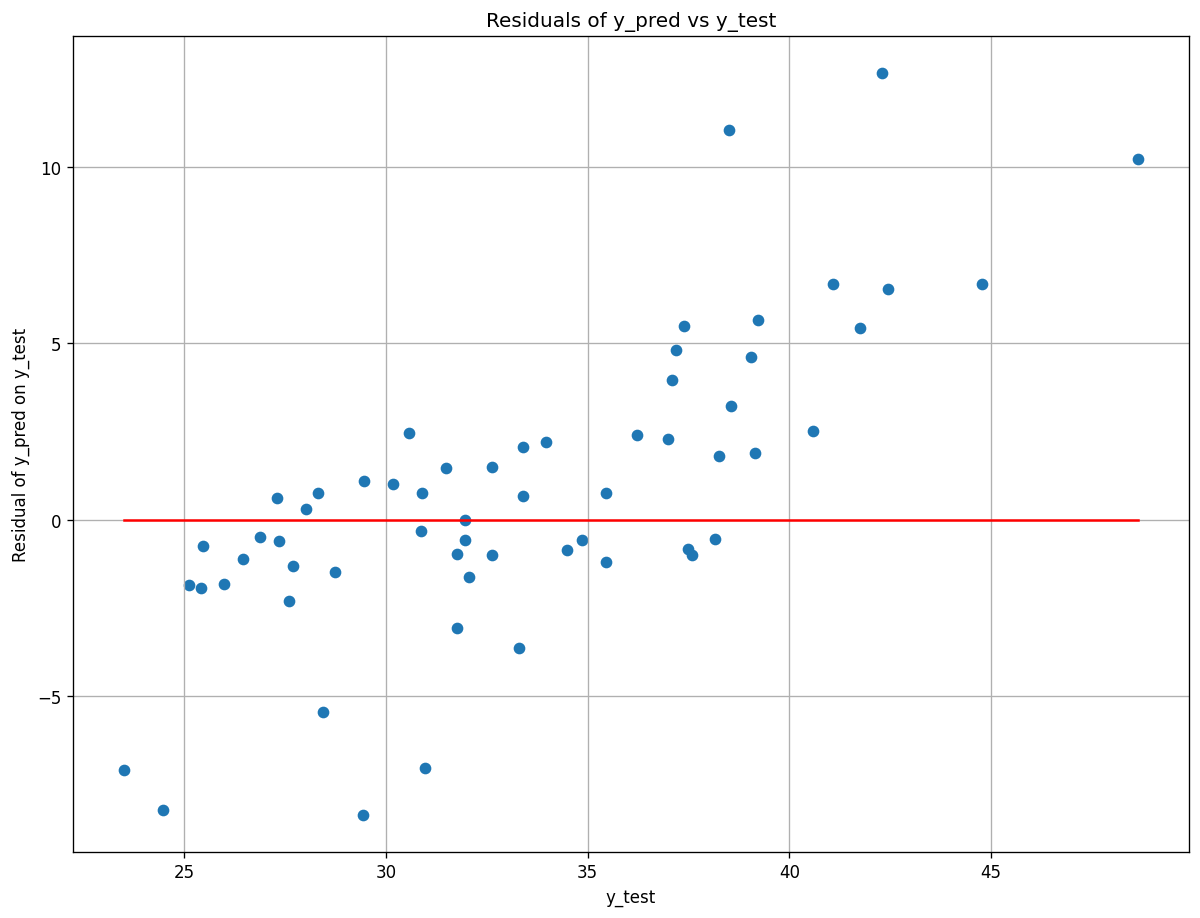

In [ ]:
figure(figsize=(12, 9), dpi=120)

plt.scatter(y2_test, [(y-x) for (y,x) in zip(list(y2_test),
                                             list(ybrf))])
plt.plot([min(y2_test), max(y2_test)], [0, 0], color="red")
plt.xlabel("y_test")
plt.ylabel("Residual of y_pred on y_test")
plt.title("Residuals of y_pred vs y_test")
plt.grid()

#### 4. Best model from 3 with RFE applied

##### Apply RFE (with cross-validation) 

In [ ]:
#Clone best performing model of previous section
rf_best22 = clone(rf_best2)

#Create Random Feature elimination for above model
selector2 = RFECV(rf_best22, cv=5, step=1, n_jobs=-1, verbose=2, min_features_to_select=len(X2.columns) // 2)

#Fit all data
selector2.fit(X2, y2)

RFECV(cv=5,
      estimator=RandomForestRegressor(criterion='absolute_error', max_depth=20,
                                      max_features='sqrt', min_samples_leaf=4,
                                      min_samples_split=10, n_estimators=900,
                                      n_jobs=-1, random_state=22122),
      min_features_to_select=7, n_jobs=-1, verbose=2)

In [ ]:
selector2.ranking_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

As the model is equal, this model will not be tested

### K-Nearest Neighbour Regression

#### 1. Basic test models with all features

In [ ]:
#KNeighbors Regressor, default parameters
knn21 = KNeighborsRegressor(n_jobs=-1)

#KNeighbors Regressor, estimates from 10 nearest neighbours, each leaf has 10
#samples
knn22 = KNeighborsRegressor(n_neighbors=10, leaf_size=50, n_jobs=-1)

#KNeighbors Regressor, estimates from 10 nearest neighbours
knn23 = KNeighborsRegressor(n_neighbors=20, n_jobs=-1)

##### Cross validation tests (both accuracy and average error)

In [ ]:
(np.mean(cross_val_score(knn21, X2, y2, cv=KFold(5), verbose=2)),
 np.mean(cross_val_score(knn21, X2, y2, cv=KFold(5), verbose=2, scoring="neg_mean_absolute_error")))

[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


(-0.4731853579281838, -3.6957841956956954)

In [ ]:
(np.mean(cross_val_score(knn22, X2, y2, cv=KFold(5), verbose=2)),
 np.mean(cross_val_score(knn22, X2, y2, cv=KFold(5), verbose=2, scoring="neg_mean_absolute_error")))

[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


(-0.27980831454850874, -3.557881694694695)

In [ ]:
(np.mean(cross_val_score(knn23, X2, y2, cv=KFold(5), verbose=2)),
 np.mean(cross_val_score(knn23, X2, y2, cv=KFold(5), verbose=2, scoring="neg_mean_absolute_error")))

[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


(-0.21428532979996467, -3.539358824074074)

##### KNeighbors Regressor 1

###### Fit

In [ ]:
knn21.fit(X2_train, y2_train)
yk21 = knn21.predict(X2_test)

###### Values

In [ ]:
yk21

array([27.95      , 38.478     , 32.574     , 34.398     , 31.588     ,
       29.61493814, 33.234     , 36.068     , 37.622     , 33.252     ,
       33.31      , 32.82204   , 28.376     , 34.436     , 35.798     ,
       38.068     , 34.768     , 33.23693814, 37.236     , 31.078     ,
       29.388     , 28.026     , 37.08      , 37.12      , 40.458     ,
       28.714     , 32.844     , 31.428     , 25.222     , 31.7       ,
       39.818     , 35.236     , 28.85402   , 31.214     , 31.31      ,
       36.282     , 33.368     , 35.408     , 27.782     , 28.688     ,
       40.34      , 29.84202   , 31.97      , 35.04      , 33.368     ,
       32.436     , 27.572     , 28.088     , 35.408     , 26.504     ,
       31.636     , 30.884     , 26.892     , 28.89202   , 26.094     ,
       31.542     , 29.864     , 38.65      , 37.7       , 27.886     ])

###### Absolute error

In [ ]:
mean_absolute_error(yk21, y2_test)

3.415238666666667

##### KNeighbors Regressor 2

###### Fit

In [ ]:
knn22.fit(X2_train, y2_train)
yk22 = knn22.predict(X2_test)

###### Values

In [ ]:
yk22

array([28.416     , 36.662     , 33.127     , 33.835     , 30.703     ,
       30.27946907, 33.514     , 37.923     , 38.836     , 31.883     ,
       37.914     , 30.60102   , 29.116     , 35.        , 36.497     ,
       36.146     , 33.446     , 31.91746907, 37.313     , 31.408     ,
       30.99      , 28.36701   , 36.75      , 37.138     , 38.272     ,
       30.06501   , 31.359     , 32.068     , 25.698     , 31.359     ,
       38.419     , 35.711     , 30.82101   , 34.932     , 31.387     ,
       35.865     , 32.96      , 34.855     , 28.832     , 28.441     ,
       37.767     , 28.27601   , 31.942     , 37.856     , 32.96      ,
       32.796     , 27.626     , 27.379     , 35.        , 28.283     ,
       30.213     , 32.14301   , 27.07      , 30.04601   , 26.607     ,
       33.961     , 30.684     , 37.689     , 36.388     , 27.494     ])

###### Absolute error

In [ ]:
mean_absolute_error(yk22, y2_test)

3.373954999999999

##### KNeighbors Regressor 3

###### Fit

In [ ]:
knn23.fit(X2_train, y2_train)
yk23 = knn23.predict(X2_test)

###### Values

In [ ]:
yk23

array([32.388     , 36.1625    , 33.244     , 34.5875    , 30.48173453,
       30.38823953, 34.25473453, 37.1595    , 37.548     , 32.113     ,
       36.5685    , 29.64601   , 31.7375    , 34.802     , 35.3415    ,
       36.6415    , 34.1455    , 31.83623453, 36.9245    , 32.1655    ,
       33.3785    , 29.436505  , 36.357     , 36.493     , 37.3975    ,
       29.52623953, 32.272     , 32.1655    , 26.573     , 32.306     ,
       37.2485    , 35.9295    , 29.169505  , 36.292     , 31.111     ,
       35.958     , 32.9995    , 34.3255    , 27.0315    , 27.924     ,
       36.476     , 29.030505  , 31.976     , 36.5545    , 32.4995    ,
       32.121     , 27.5275    , 27.709     , 34.19      , 28.387     ,
       29.56851   , 30.437505  , 28.13      , 29.52623953, 27.084005  ,
       33.821     , 30.236005  , 36.6365    , 36.5345    , 27.007     ])

###### Absolute error

In [ ]:
mean_absolute_error(yk23, y2_test)

3.364988416666667

#### 2. Hyper-parameter optimization using the GridSearchCV algorithm

##### Parameter distribution grid

In [ ]:
# Loss
weights = ["uniform", "distance"]
# Number of estimators
n_neighbours = [1, 2, 3, 4, 6, 12, 24]
# Criterion for measuring quality of split
p = [1, 2]
# Minimum number of samples required to split a node
leaf_size = [i for i in range(10, 50, 10)]
# Create the random grid
knn_grid = {'weights': weights,
            'n_neighbors': n_neighbours,
            'p': p,
            'leaf_size': leaf_size}

##### GridSearchCV algorithm

In [ ]:
knnb3 = KNeighborsRegressor(n_jobs=-1)

knn_gs3 = GridSearchCV(estimator = knnb3, param_grid = knn_grid,
                      scoring="neg_mean_absolute_error",
                      n_jobs=-1, cv=KFold(5), return_train_score=True,
                      verbose=4)

knn_gs3.fit(X2, y2)

Fitting 5 folds for each of 112 candidates, totalling 560 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=KNeighborsRegressor(n_jobs=-1), n_jobs=-1,
             param_grid={'leaf_size': [10, 20, 30, 40],
                         'n_neighbors': [1, 2, 3, 4, 6, 12, 24], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=4)

In [ ]:
knn_gs3.best_estimator_

KNeighborsRegressor(leaf_size=10, n_jobs=-1, n_neighbors=12)

##### 2. Best model

###### Defining best model

In [ ]:
knn_best2 = KNeighborsRegressor(leaf_size=10, n_jobs=-1, n_neighbors=12)


###### Cross validation (both accuracy and absolute error)

In [ ]:
(np.mean(cross_val_score(knn_best2, X2, y2, cv=KFold(5), verbose=2)),
 np.mean(cross_val_score(knn_best2, X2, y2, cv=KFold(5), verbose=2, scoring="neg_mean_absolute_error")))

[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


(-0.22779793037649637, -3.4860322391141145)

###### Fit

In [ ]:
knn_best2.fit(X2_train, y2_train)
ybknn = knn_best2.predict(X2_test)

###### Values

In [ ]:
ybknn

array([28.96416667, 36.41916667, 32.44916667, 34.055     , 30.82039089,
       30.01289089, 33.00289089, 37.7125    , 38.10083333, 31.4725    ,
       37.5675    , 30.46918333, 29.70166667, 34.91333333, 36.03083333,
       36.05333333, 33.60166667, 31.74872422, 36.71083333, 31.45833333,
       32.00833333, 28.56584167, 36.3875    , 36.3875    , 38.2225    ,
       29.78250833, 31.68416667, 31.84666667, 25.92      , 31.16666667,
       37.30833333, 35.3775    , 30.23500833, 35.06666667, 31.36      ,
       35.36666667, 33.19666667, 35.16416667, 27.9575    , 28.07416667,
       37.3075    , 27.70834167, 31.895     , 37.155     , 32.20083333,
       33.10833333, 26.96083333, 27.70666667, 34.82416667, 28.13416667,
       30.18500833, 31.489175  , 28.23916667, 29.65334167, 26.6775    ,
       33.675     , 30.46666667, 37.28333333, 37.28333333, 27.11083333])

###### Absolute error

In [ ]:
mean_absolute_error(ybknn, y2_test)

### Decision Tree Regressor

#### 1. Basic test models with all features

In [ ]:
#Decision Tree, absolute error scoring, random state set
dt1 = DecisionTreeRegressor(random_state=22122,
                             criterion="absolute_error")

#Decision Tree, absolute error scoring, min 10 samples required to split node, 
#random state set
dt2 = DecisionTreeRegressor(max_features=len(X2.columns)//2,
                             random_state=22122,
                             min_samples_split=10,
                             criterion="absolute_error")

#Decision Tree, absolute errort scoring, min 15 samples to split node,
#max depth of 40, at least 2 samples per leaf, randomly split
dt3 = DecisionTreeRegressor(random_state=22122,
                             max_depth=40,
                             min_samples_split=15,
                             min_samples_leaf=2,
                             splitter="random",
                             criterion="absolute_error")


##### Cross validation tests (both accuracy and average error)

In [ ]:
(np.mean(cross_val_score(dt1, X2, y2, cv=KFold(5), verbose=2)),
 np.mean(cross_val_score(dt1, X2, y2, cv=KFold(5), verbose=2, scoring="neg_mean_absolute_error")))

[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


(-3.03879166865154, -4.6448142054554555)

In [ ]:
(np.mean(cross_val_score(dt2, X2, y2, cv=KFold(5), verbose=2)),
 np.mean(cross_val_score(dt2, X2, y2, cv=KFold(5), verbose=2, scoring="neg_mean_absolute_error")))

[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


(-1.62898827976765, -4.614895586211212)

In [ ]:
(np.mean(cross_val_score(dt3, X2, y2, cv=KFold(5), verbose=2)),
 np.mean(cross_val_score(dt3, X2, y2, cv=KFold(5), verbose=2, scoring="neg_mean_absolute_error")))

[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


(-0.6207967812979823, -4.147394127877877)

##### Decision Tree 1

###### Fit

In [ ]:
dt1.fit(X2_train, y2_train)
yd1 = dt1.predict(X2_test)

###### Values

In [ ]:
yd1

array([30.79  , 46.52  , 31.76  , 31.17  , 33.98  , 22.45  , 32.92  ,
       41.86  , 41.86  , 37.1   , 34.09  , 31.92  , 30.79  , 29.23  ,
       34.48  , 42.63  , 37.1   , 35.52  , 37.97  , 31.17  , 34.28  ,
       28.39  , 48.46  , 34.38  , 44.87  , 29.86  , 33.6   , 30.01  ,
       29.3501, 24.08  , 34.67  , 46.52  , 27.7   , 31.47  , 36.61  ,
       39.33  , 31.66  , 34.18  , 26.98  , 27.49  , 33.21  , 27.7   ,
       36.61  , 41.86  , 27.    , 31.17  , 27.39  , 22.14  , 31.47  ,
       25.74  , 27.39  , 29.3501, 22.45  , 28.1   , 27.8   , 33.89  ,
       31.3001, 35.06  , 34.09  , 27.39  ])

###### Absolute error

In [ ]:
mean_absolute_error(yd1, y2_test)

3.929173333333333

##### Decision Tree 2

###### Fit

In [7]:
dt2.fit(X2_train, y2_train)
yd2 = dt2.predict(X2_test)

NameError: ignored

###### Values

In [ ]:
yd2

array([28.26      , 40.79      , 31.66      , 31.66      , 33.71469069,
       27.18      , 32.825     , 36.9       , 36.9       , 37.        ,
       34.38      , 30.99505   , 34.38      , 33.31      , 34.38      ,
       42.485     , 37.        , 32.825     , 36.9       , 37.49      ,
       30.74      , 28.205     , 40.79      , 40.79      , 36.9       ,
       30.99505   , 33.31      , 37.49      , 27.7       , 24.08      ,
       34.38      , 37.        , 28.21      , 30.74      , 36.61      ,
       36.71      , 33.31      , 36.71      , 30.995     , 27.49      ,
       36.71      , 28.21      , 37.49      , 36.9       , 33.31      ,
       31.66      , 27.18      , 22.09      , 31.66      , 27.18      ,
       27.7       , 27.7       , 31.92      , 28.205     , 27.7       ,
       33.635     , 30.99505   , 36.9       , 34.38      , 27.18      ])

###### Absolute error

In [6]:
mean_absolute_error(yd2, y2_test)

NameError: ignored

##### Decision Tree 3

###### Fit

In [ ]:
dt3.fit(X2_train, y2_train)
yd3 = dt3.predict(X2_test)

###### Values

In [ ]:
yd3

array([28.75 , 40.835, 33.89 , 31.66 , 29.76 , 32.025, 34.33 , 40.835,
       40.79 , 38.75 , 35.445, 29.07 , 28.75 , 31.66 , 34.33 , 33.7  ,
       40.835, 34.29 , 40.79 , 31.66 , 34.28 , 28.055, 40.79 , 40.835,
       40.79 , 29.76 , 35.445, 31.66 , 29.07 , 35.445, 34.33 , 38.75 ,
       29.07 , 28.75 , 33.6  , 33.7  , 31.66 , 31.66 , 29.07 , 26.82 ,
       35.445, 29.07 , 33.6  , 40.835, 35.445, 40.835, 26.98 , 26.98 ,
       31.66 , 29.07 , 29.07 , 28.055, 26.98 , 28.055, 32.025, 35.445,
       29.76 , 40.835, 33.6  , 29.07 ])

###### Absolute error

In [ ]:
mean_absolute_error(yd3, y2_test)

3.2705016666666666

### 2. Feature selection with Random Feature Elimination

#### Apply RFE (with cross-validation) 

In [ ]:
dt4 = clone(dt3)

selector3 = RFECV(dt4, cv=5, step=1, n_jobs=-1, verbose=2, min_features_to_select=len(X2.columns) // 2)
selector3.fit(X2, y2)

Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.


RFECV(cv=5,
      estimator=DecisionTreeRegressor(criterion='absolute_error', max_depth=40,
                                      min_samples_leaf=2, min_samples_split=15,
                                      random_state=22122, splitter='random'),
      min_features_to_select=7, n_jobs=-1, verbose=2)

In [ ]:
selector3.feature_names_in_, selector3.ranking_

(array(['Month', 'Butter', 'Cheese', 'Domestic milk intake', 'Fat content',
        'Heifers 200-249kg', 'Heifers 250-299kg', 'Heifers 300-349kg',
        'Heifers 350-399kg', 'Heifers 400-449kg', 'Skimmed milk sales',
        'Skimmed milk powder', 'Whole milk sales', 'Imported milk intake',
        'Volume'], dtype=object),
 array([1, 2, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]))

#### Define model with new data

In [ ]:
rankings = selector3.ranking_
columns_to_choose = [X2.columns[i] for i in range(len(X2.columns)) if rankings[i] == 1]
rfe_dtX2 = X2[columns_to_choose]
rfe_dtX2_train = X2_train[columns_to_choose]
rfe_dtX2_test = X2_test[columns_to_choose]

#### Cross validation (both accuracy and absolute error)

In [8]:
(np.mean(cross_val_score(dt4, rfe_dtX2, y2, cv=KFold(5), verbose=2)),
 np.mean(cross_val_score(dt4, rfe_dtX2, y2, cv=KFold(5), verbose=2, scoring="neg_mean_absolute_error")))

NameError: ignored

#### Fit

In [ ]:
dt4.fit(rfe_dtX2_train, y2_train)
yd4 = dt4.predict(rfe_dtX2_test)

#### Results

In [ ]:
yd4

array([36.81 , 41.86 , 33.62 , 33.795, 30.48 , 26.15 , 33.62 , 41.86 ,
       41.86 , 33.62 , 33.795, 30.48 , 36.81 , 33.795, 33.455, 36.81 ,
       36.27 , 33.62 , 36.27 , 31.66 , 33.795, 28.39 , 41.86 , 36.27 ,
       41.86 , 29.225, 31.66 , 31.66 , 25.415, 24.08 , 36.855, 41.86 ,
       29.225, 36.81 , 28.75 , 36.81 , 33.455, 36.81 , 27.235, 27.235,
       36.81 , 40.155, 31.66 , 41.86 , 33.455, 31.66 , 25.22 , 28.42 ,
       33.455, 27.7  , 27.7  , 28.39 , 25.415, 28.39 , 27.7  , 36.81 ,
       30.48 , 33.455, 33.455, 27.7  ])

#### Absolute error

In [ ]:
mean_absolute_error(yd4, y2_test)

3.780338333333334

### 3. Create model with best parameters using GridSearchCV

#### Parameter distribution grid 



In [ ]:
# Number of features to consider at every split
max_features = ['auto', 'sqrt', 'log2']
# Maximum number of levels in tree
max_depth = [i for i in range(10, 101, 10)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [5, 7, 10, 20]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# what type of split to choose (prediction: best0)
splitter = ["best", "random"]
# Create the random grid
decision_grid = {'max_features': max_features,
                 'max_depth': max_depth,
                 'min_samples_split': min_samples_split,
                 'min_samples_leaf': min_samples_leaf,
                 'splitter': splitter}

#### GridSearchCV algorithm

In [ ]:
dt = DecisionTreeRegressor(random_state=22122, criterion="absolute_error")

dt_random = GridSearchCV(estimator = dt, param_grid = decision_grid,
                         scoring="neg_mean_absolute_error",
                         n_jobs=-1, cv=KFold(5), return_train_score=True,
                         verbose=4)

dt_random.fit(X2, y2)

Fitting 5 folds for each of 792 candidates, totalling 3960 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=DecisionTreeRegressor(criterion='absolute_error',
                                             random_state=22122),
             n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100,
                                       None],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [5, 7, 10, 20],
                         'splitter': ['best', 'random']},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=4)

In [ ]:
dt_random.best_estimator_

DecisionTreeRegressor(criterion='absolute_error', max_depth=10,
                      max_features='auto', min_samples_leaf=2,
                      min_samples_split=7, random_state=22122,
                      splitter='random')

In [ ]:
dt_random.best_estimator_.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'absolute_error',
 'max_depth': 10,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 2,
 'min_samples_split': 7,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 22122,
 'splitter': 'random'}

### 4. Decision Tree GridSearchCV

#### Defining best model

In [ ]:
dt_best = DecisionTreeRegressor(criterion='absolute_error', max_depth=10,
                      max_features='auto', min_samples_leaf=2,
                      min_samples_split=7, random_state=22122,
                      splitter='random')

#### Cross validation (both accuracy and absolute error)

In [ ]:
(np.mean(cross_val_score(dt_best, X2, y2, cv=KFold(5), verbose=2)),
 np.mean(cross_val_score(dt_best, X2, y2, cv=KFold(5), verbose=2, scoring="neg_mean_absolute_error")))

[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


(-0.4330154478231747, -3.754938919544545)

#### Fit

In [ ]:
dt_best.fit(X2_train, y2_train)
ybdt = dt_best.predict(X2_test)

#### Results

In [ ]:
ybdt

array([29.815  , 46.52   , 31.32   , 36.95   , 29.66   , 33.57   ,
       31.56   , 46.52   , 46.52   , 31.76   , 33.65   , 29.71005,
       37.1    , 31.08   , 31.66   , 35.885  , 31.08   , 38.42   ,
       35.885  , 31.08   , 34.38   , 28.3    , 46.52   , 33.07   ,
       46.52   , 29.66   , 31.08   , 31.08   , 29.71005, 25.88   ,
       34.67   , 46.52   , 27.595  , 34.38   , 36.61   , 37.1    ,
       36.95   , 37.1    , 29.71005, 27.49   , 33.65   , 27.595  ,
       31.08   , 46.52   , 31.32   , 31.08   , 27.18   , 31.56   ,
       31.32   , 29.71005, 29.71005, 27.7    , 25.74   , 28.3    ,
       27.08   , 29.815  , 29.66   , 33.07   , 31.66   , 29.71005])

#### Absolute error

In [ ]:
mean_absolute_error(ybdt, y2_test)

4.151338333333333

## Test 2 (on Ireland and Netherlands)

### Set up Train/Test data

In [20]:
dfc = pd.concat([df2, dfn])

In [21]:
dfc

,Year,Month,Raw milk price,Butter,Cheese,Domestic milk intake,Fat content,Heifers 200-249kg,Heifers 250-299kg,Heifers 300-349kg,Heifers 350-399kg,Heifers 400-449kg,Skimmed milk sales,Skimmed milk powder,Whole milk sales,Imported milk intake,Volume,Concentrated milk
0,2002.0,1.0,28.39,2.30,1.20,117.3,3.82,274.71,325.25,390.32,467.19,559.87,9.9,3.10,36.1,16.8,134.100000,46.00
1,2002.0,2.0,27.35,3.80,1.70,165.2,3.77,286.94,328.66,398.31,522.77,576.65,9.3,2.90,32.9,21.9,187.100000,42.20
2,2002.0,3.0,25.99,9.80,5.20,337.5,3.73,283.65,332.73,437.81,519.85,566.68,10.1,5.30,34.6,29.2,366.700000,44.70
3,2002.0,4.0,25.47,16.60,13.70,596.4,3.60,279.94,380.13,455.14,510.17,589.39,10.0,8.90,34.7,31.2,627.600000,44.70
4,2002.0,5.0,25.57,20.10,14.80,709.0,3.59,310.74,388.89,440.45,528.76,569.65,10.3,11.80,35.9,31.6,740.600000,46.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,2021.0,3.0,37.75,13.38,84.30,NaN,4.57,NaN,NaN,NaN,NaN,NaN,NaN,7.21,NaN,NaN,1179.556371,31.27
236,2021.0,5.0,38.00,11.66,83.84,NaN,4.41,NaN,NaN,NaN,NaN,NaN,NaN,10.11,NaN,NaN,1178.274435,33.34
237,2021.0,11.0,39.50,9.58,75.36,NaN,4.53,NaN,NaN,NaN,NaN,NaN,NaN,8.46,NaN,NaN,1029.045374,31.66
238,2021.0,10.0,41.25,11.24,77.56,NaN,4.47,NaN,NaN,NaN,NaN,NaN,NaN,5.55,NaN,NaN,1056.160273,31.83


In [22]:
dfc = dfc.dropna(axis=1, how="any")

In [23]:
dfc

,Year,Month,Raw milk price,Butter,Cheese,Fat content,Skimmed milk powder,Volume,Concentrated milk
0,2002.0,1.0,28.39,2.30,1.20,3.82,3.10,134.100000,46.00
1,2002.0,2.0,27.35,3.80,1.70,3.77,2.90,187.100000,42.20
2,2002.0,3.0,25.99,9.80,5.20,3.73,5.30,366.700000,44.70
3,2002.0,4.0,25.47,16.60,13.70,3.60,8.90,627.600000,44.70
4,2002.0,5.0,25.57,20.10,14.80,3.59,11.80,740.600000,46.20
...,...,...,...,...,...,...,...,...,...
235,2021.0,3.0,37.75,13.38,84.30,4.57,7.21,1179.556371,31.27
236,2021.0,5.0,38.00,11.66,83.84,4.41,10.11,1178.274435,33.34
237,2021.0,11.0,39.50,9.58,75.36,4.53,8.46,1029.045374,31.66
238,2021.0,10.0,41.25,11.24,77.56,4.47,5.55,1056.160273,31.83


In [24]:
Xc = dfc[["Month"]+(list(dfc.columns[3:-1]))]
yc = dfc["Raw milk price"]

stratifyc = dfc["Month"]

Xc_train, Xc_test, yc_train, yc_test = train_test_split(Xc, yc, random_state=22122,
                                                        stratify=stratifyc)

In [25]:
Xc

,Month,Butter,Cheese,Fat content,Skimmed milk powder,Volume
0,1.0,2.30,1.20,3.82,3.10,134.100000
1,2.0,3.80,1.70,3.77,2.90,187.100000
2,3.0,9.80,5.20,3.73,5.30,366.700000
3,4.0,16.60,13.70,3.60,8.90,627.600000
4,5.0,20.10,14.80,3.59,11.80,740.600000
...,...,...,...,...,...,...
235,3.0,13.38,84.30,4.57,7.21,1179.556371
236,5.0,11.66,83.84,4.41,10.11,1178.274435
237,11.0,9.58,75.36,4.53,8.46,1029.045374
238,10.0,11.24,77.56,4.47,5.55,1056.160273


In [26]:
Xc_train

,Month,Butter,Cheese,Fat content,Skimmed milk powder,Volume
0,1.0,2.30,1.20,3.82,3.10000,134.100000
81,11.0,9.84,55.98,4.48,5.46000,888.508232
28,5.0,18.20,14.30,3.54,11.70000,727.000000
111,2.0,10.19,58.80,4.52,4.25000,887.575914
179,12.0,8.30,4.20,4.40,4.37625,244.000000
...,...,...,...,...,...,...
148,1.0,13.33,69.00,4.46,5.58000,1042.952443
209,6.0,28.10,33.30,3.92,18.40000,1061.100000
79,8.0,13.40,20.10,3.85,5.40000,579.000000
153,11.0,10.39,60.14,4.44,4.68000,948.953479


In [27]:
yc_test

83     32.95
63     27.29
58     30.78
207    31.66
181    35.00
       ...  
114    33.70
181    34.18
13     26.55
148    37.10
213    36.61
Name: Raw milk price, Length: 120, dtype: float64

### Random Forest

#### 1. Basic test to test for suitability for remaining sections

In [9]:
#Random forest(basic features, randomized state, squared error scoring)
rf1c = RandomForestRegressor(criterion="absolute_error")

#Random forest, 500 estimators, 20 samples to split a node, min 5 samples at
#leaf nodes, squared error scoring, non-random state set
rf2c = RandomForestRegressor(n_estimators=500, min_samples_split=20, 
                             min_samples_leaf=5, n_jobs=-1, 
                             criterion="absolute_error", random_state=22122)

#Random forest, 1000 estimators, squared error scoring, non-random state set
rf3c = RandomForestRegressor(n_estimators=1000, n_jobs=-1,
                            criterion="absolute_error", random_state=22122)

##### Cross-validation tests (accuracy and mean average error)

In [ ]:
(np.mean(cross_val_score(rf1c, Xc, yc, cv=KFold(5), verbose=3)),
 np.mean(cross_val_score(rf1c, Xc, yc, cv=KFold(5), verbose=3, scoring="neg_mean_absolute_error")))

In [ ]:
(np.mean(cross_val_score(rf2c, Xc, yc, cv=KFold(5), verbose=3)),
 np.mean(cross_val_score(rf2c, Xc, yc, cv=KFold(5), verbose=3, scoring="neg_mean_absolute_error")))

In [ ]:
(np.mean(cross_val_score(rf3c, Xc, yc, cv=KFold(5), verbose=3)),
 np.mean(cross_val_score(rf3c, Xc, yc, cv=KFold(5), verbose=3, scoring="neg_mean_absolute_error")))

##### Random Forest 1

###### Fit

In [ ]:
rf1c.fit(Xc_train, yc_train)
y1c = rf1c.predict(Xc_test)

###### Values

In [ ]:
y1c

###### Absolute error

In [ ]:
mean_absolute_error(yc_test, y1c)

##### Random Forest 2

###### Fit

In [ ]:
rf2c.fit(Xc_train, yc_train)
y2c = rf2c.predict(Xc_test)

###### Values

In [ ]:
y2c

###### Absolute error

In [ ]:
mean_absolute_error(yc_test, y2c)

##### Random Forest 3

###### Fit

In [ ]:
rf3c.fit(Xc_train, yc_train)
y3c = rf3c.predict(Xc_test)

###### Values

In [ ]:
y3c

###### Absolute error

In [ ]:
mean_absolute_error(yc_test, y3c)

#### 2. Hyper-parameter optimization using GridSearchCV

##### Parameter distribution grid

In [ ]:
n_estimators = [i for i in range(100, 1001, 100)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [i for i in range(10, 101, 10)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 3, 4, 5, 7, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

##### GridSearchCV

In [ ]:
rfbc = RandomForestRegressor(random_state=22122,
                            n_jobs=-1, criterion="absolute_error")

gs_randomc = GridSearchCV(estimator = rfbc, param_grid = random_grid,
                          scoring="neg_mean_absolute_error",
                          n_jobs=-1, cv=KFold(5), return_train_score=True,
                          verbose=4)

gs_randomc.fit(Xc, yc)

In [ ]:
gs_randomc.best_estimator_

RandomForestRegressor(criterion='absolute_error', max_depth=10,
                      min_samples_leaf=4, min_samples_split=5, n_jobs=-1,
                      random_state=22122)

In [46]:
rf_bestc = RandomForestRegressor(criterion='absolute_error', max_depth=10,
                                 min_samples_leaf=4, min_samples_split=5, n_jobs=-1,
                                 random_state=22122)

##### Random Forest GridSearchCV

###### Cross validation (both accuracy and absolute error)

In [47]:
(np.mean(cross_val_score(rf_bestc, Xc, yc, cv=KFold(5), verbose=2)),
 np.mean(cross_val_score(rf_bestc, Xc, yc, cv=KFold(5), verbose=2, scoring="neg_mean_absolute_error")))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END .................................................... total time=   2.6s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.6s remaining:    0.0s


[CV] END .................................................... total time=   0.7s
[CV] END .................................................... total time=   0.7s
[CV] END .................................................... total time=   0.6s
[CV] END .................................................... total time=   0.7s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    5.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END .................................................... total time=   0.7s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


[CV] END .................................................... total time=   0.7s
[CV] END .................................................... total time=   0.6s
[CV] END .................................................... total time=   0.9s
[CV] END .................................................... total time=   1.0s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    3.8s finished


(-0.10028677768195907, -4.0609759518943935)

###### Fit

In [48]:
rf_bestc.fit(Xc_train, yc_train)
yrfbc = rf_bestc.predict(Xc_test)

###### Results

In [49]:
yrfbc

array([31.57880991, 25.1419    , 33.671404  , 32.7380015 , 34.375602  ,
       33.9691    , 35.08005191, 32.9255    , 28.224706  , 32.85610041,
       31.912416  , 33.45474731, 32.668001  , 34.37795   , 32.347051  ,
       30.8048015 , 33.42167236, 27.11685   , 26.9506515 , 32.522553  ,
       29.553718  , 33.3633015 , 31.2924545 , 35.6754    , 32.174058  ,
       33.34888276, 37.13245   , 32.119506  , 35.32566867, 32.74057636,
       29.008105  , 32.94459891, 35.17335   , 35.0261    , 35.404601  ,
       35.15169991, 32.7074585 , 34.1616605 , 30.9926065 , 32.37055   ,
       33.67545131, 34.39005   , 34.287204  , 32.030004  , 30.8288025 ,
       37.6928    , 35.88675   , 29.7949635 , 33.49010041, 27.002401  ,
       33.1452555 , 28.2639    , 32.43988385, 30.2423535 , 32.4478035 ,
       30.01345841, 28.675806  , 29.63080341, 30.406901  , 32.0361133 ,
       31.48760841, 31.42445   , 26.4478    , 37.18235   , 38.09685   ,
       31.9356025 , 30.02095131, 27.02365   , 33.6814    , 32.90

###### Absolute error

In [50]:
mean_absolute_error(yrfbc, yc_test)

3.34990115706957

###### Plot

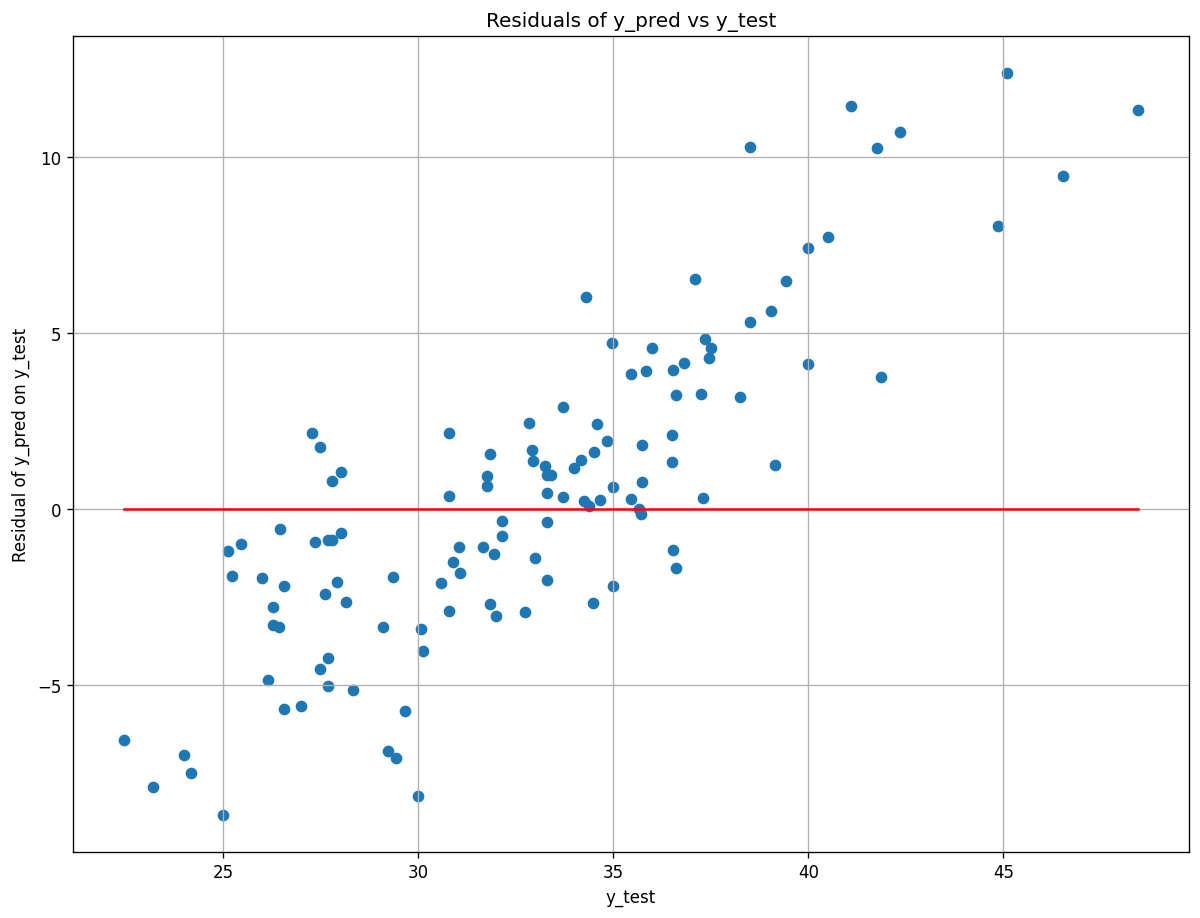

In [52]:
figure(figsize=(12, 9), dpi=120)

plt.scatter(yc_test, [(y-x) for (y,x) in zip(list(yc_test),
                                             list(yrfbc))])
plt.plot([min(yc_test), max(yc_test)], [0, 0], color="red")
plt.xlabel("y_test")
plt.ylabel("Residual of y_pred on y_test")
plt.title("Residuals of y_pred vs y_test")
plt.grid()

### K-Nearest Neighbour Regression

#### 1. Basic test models with all features

In [ ]:
#KNeighbors Regressor, default parameters
knn1c = KNeighborsRegressor(n_jobs=-1)

#KNeighbors Regressor, estimates from 10 nearest neighbours, each leaf has 10
#samples
knn2c = KNeighborsRegressor(n_neighbors=10, leaf_size=50, n_jobs=-1)

#KNeighbors Regressor, estimates from 10 nearest neighbours
knn3c = KNeighborsRegressor(n_neighbors=20, n_jobs=-1)

##### Cross validation tests (both accuracy and average error)

In [ ]:
(np.mean(cross_val_score(knn1c, Xc, yc, cv=KFold(5), verbose=2)),
 np.mean(cross_val_score(knn1c, Xc, yc, cv=KFold(5), verbose=2, scoring="neg_mean_absolute_error")))

[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


(-0.38656907146799036, -4.52111293993994)

In [ ]:
(np.mean(cross_val_score(knn2c, Xc, yc, cv=KFold(5), verbose=2)),
 np.mean(cross_val_score(knn2c, Xc, yc, cv=KFold(5), verbose=2, scoring="neg_mean_absolute_error")))

[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


(-0.325588829588341, -4.4634345457582585)

In [ ]:
(np.mean(cross_val_score(knn3c, Xc, yc, cv=KFold(5), verbose=2)),
 np.mean(cross_val_score(knn3c, Xc, yc, cv=KFold(5), verbose=2, scoring="neg_mean_absolute_error")))

[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


(-0.3423222551141766, -4.511881367561311)

##### KNeighbors Regressor 1

###### Fit

In [ ]:
knn1c.fit(Xc_train, yc_train)
yk1c = knn1c.predict(Xc_test)

###### Value

In [ ]:
yk1c

array([30.35602   , 26.338     , 29.12002   , 33.312     , 35.95      ,
       32.82      , 31.294     , 34.8       , 29.704     , 28.17      ,
       39.458     , 38.87      , 27.832     , 34.        , 33.89      ,
       29.952     , 35.362     , 30.486     , 28.518     , 35.39402   ,
       30.54804   , 35.346     , 34.124     , 35.55      , 29.376     ,
       31.94      , 34.266     , 28.25202   , 33.33095814, 30.148     ,
       37.5       , 30.528     , 34.75      , 35.55      , 32.812     ,
       28.858     , 28.084     , 34.026     , 27.83      , 25.122     ,
       35.508     , 35.7       , 32.194     , 34.228     , 30.96      ,
       33.66      , 37.48      , 30.09602   , 35.362     , 25.122     ,
       34.728     , 29.686     , 35.88495814, 29.952     , 32.47      ,
       28.304     , 32.018     , 31.72802   , 25.122     , 31.94      ,
       33.914     , 32.2       , 28.17      , 38.9       , 34.532     ,
       34.148     , 32.792     , 30.052     , 33.55      , 30.78

###### Absolute error

In [ ]:
mean_absolute_error(yk1c, yc_test)

4.194287635635636

##### KNeighbors Regressor 2

###### Fit

In [ ]:
knn2c.fit(Xc_train, yc_train)
yk2c = knn2c.predict(Xc_test)

###### Values

In [ ]:
yk2c

array([30.42802   , 28.90001   , 28.61702   , 35.357     , 36.325     ,
       33.385     , 31.25301   , 34.425     , 30.992     , 28.43401   ,
       35.02      , 34.194     , 29.458     , 33.725     , 31.237     ,
       30.716     , 34.194     , 30.82      , 30.09801   , 34.62401   ,
       30.36703   , 36.768     , 35.152     , 37.49      , 32.243     ,
       31.453     , 34.011     , 29.01503   , 33.71747907, 30.924     ,
       35.02      , 30.725     , 35.25      , 37.375     , 33.041     ,
       32.735     , 29.63001   , 34.05801   , 30.725     , 27.312     ,
       36.19      , 34.075     , 32.729     , 32.019     , 31.74101   ,
       31.941     , 34.427     , 30.22001   , 35.152     , 27.312     ,
       35.277     , 31.604     , 34.63547907, 29.733     , 31.76      ,
       29.63001   , 32.02401   , 30.52601   , 27.312     , 31.453     ,
       34.65      , 31.7       , 28.43401   , 38.175     , 31.41001   ,
       33.847     , 30.52601   , 30.82      , 34.05      , 32.02

###### Absolute error

In [ ]:
mean_absolute_error(yk2c, yc_test)

4.269181976726727

##### KNeighbors Regressor 3

###### Fit

In [ ]:
knn3c.fit(Xc_train, yc_train)
yk3c = knn3c.predict(Xc_test)

###### Values

In [ ]:
yk3c

array([30.270025  , 29.425505  , 29.803515  , 35.991     , 34.25      ,
       34.905     , 33.032005  , 34.6875    , 29.724005  , 29.974005  ,
       33.980005  , 34.727     , 29.634     , 35.075     , 32.605     ,
       30.001515  , 34.2745    , 33.0565    , 29.703505  , 33.122505  ,
       29.20602   , 35.9715    , 35.0185    , 36.051     , 33.0515    ,
       32.12574453, 32.745505  , 29.91302   , 32.96724453, 32.1095    ,
       33.236505  , 33.2255    , 35.225     , 36.251     , 34.4895    ,
       32.235     , 30.398015  , 32.230505  , 33.2255    , 29.9875    ,
       34.9035    , 34.375     , 33.132505  , 32.558505  , 32.510505  ,
       32.669005  , 35.851     , 29.803015  , 35.0185    , 29.9875    ,
       34.436     , 31.2795    , 32.59073953, 29.59552   , 31.762505  ,
       30.398015  , 32.407005  , 32.12574453, 29.9875    , 32.12574453,
       32.581005  , 33.025     , 29.531005  , 37.9485    , 33.136505  ,
       32.5875    , 32.12574453, 32.237     , 33.5625    , 31.24

###### Absolute error

In [ ]:
mean_absolute_error(yk3c, yc_test)

4.212935579454455

#### 2. GridSearchCV

##### Parameter grid

In [11]:
# Loss
weights = ["uniform", "distance"]
# Number of estimators
n_neighbours = [1, 2, 3, 4, 6, 12, 24]
# Criterion for measuring quality of split
p = [1, 2]
# Minimum number of samples required to split a node
leaf_size = [i for i in range(10, 50, 10)]
# Create the random grid
knn_grid = {'weights': weights,
            'n_neighbors': n_neighbours,
            'p': p,
            'leaf_size': leaf_size}

##### GridSearchCV algorithm

In [ ]:
knnb3c = KNeighborsRegressor(n_jobs=-1)

knn_gs3c = GridSearchCV(estimator = knnb3c, param_grid = knn_grid,
                      scoring="neg_mean_absolute_error",
                      n_jobs=-1, cv=KFold(5), return_train_score=True,
                      verbose=4)

knn_gs3c.fit(X2, y2)

Fitting 5 folds for each of 112 candidates, totalling 560 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=KNeighborsRegressor(n_jobs=-1), n_jobs=-1,
             param_grid={'leaf_size': [10, 20, 30, 40],
                         'n_neighbors': [1, 2, 3, 4, 6, 12, 24], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=4)

In [ ]:
knn_gs3.best_estimator_

KNeighborsRegressor(leaf_size=10, n_jobs=-1, n_neighbors=12)

##### Best model

###### Defining best model

In [ ]:
knn_bestc = KNeighborsRegressor(leaf_size=10, n_jobs=-1, n_neighbors=12)


###### Cross validation (both accuracy and absolute error)

In [ ]:
(np.mean(cross_val_score(knn_bestc, Xc, yc, cv=KFold(5), verbose=2)),
 np.mean(cross_val_score(knn_bestc, Xc, yc, cv=KFold(5), verbose=2, scoring="neg_mean_absolute_error")))

[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


(-0.32365345637127363, -4.477008056629546)

###### Fit

In [ ]:
knn_bestc.fit(Xc_train, yc_train)
ybknnc = knn_bestc.predict(Xc_test)

###### Results

In [ ]:
ybknnc

array([30.09668333, 29.239175  , 29.11918333, 35.81833333, 35.58333333,
       33.9875    , 30.41084167, 34.35416667, 30.49500833, 29.83750833,
       34.525     , 33.93416667, 29.38833333, 33.39583333, 31.3725    ,
       29.66916667, 33.97      , 31.3725    , 29.87834167, 33.80250833,
       29.95085833, 36.66083333, 33.97      , 36.68416667, 31.4125    ,
       31.12834167, 34.356675  , 29.252525  , 33.44123256, 30.89083333,
       33.71916667, 31.09916667, 35.45833333, 37.45      , 34.8675    ,
       32.745     , 29.621675  , 34.58834167, 31.71416667, 27.75      ,
       36.02583333, 34.        , 32.44000833, 31.5375    , 31.81250833,
       32.37916667, 35.81416667, 30.21085   , 33.97      , 27.75      ,
       35.335     , 31.68      , 34.20789922, 30.495     , 31.29500833,
       29.32750833, 32.126675  , 30.766675  , 27.75      , 31.49205756,
       34.13416667, 32.33333333, 29.449175  , 37.91666667, 33.53250833,
       33.5475    , 31.39500833, 31.3725    , 33.33333333, 31.99

###### Absolute error

In [ ]:
mean_absolute_error(ybknnc, yc_test)

4.206547106564899

### Decision Tree Regressor

#### 1. Basic test models with all features

In [ ]:
#Decision Tree, absolute error scoring, random state set
dt1c = DecisionTreeRegressor(random_state=22122,
                             criterion="absolute_error")

#Decision Tree, absolute error scoring, min 10 samples required to split node, 
#random state set
dt2c = DecisionTreeRegressor(max_features=len(Xc.columns)//2,
                             random_state=22122,
                             min_samples_split=10,
                             criterion="absolute_error")

#Decision Tree, absolute errort scoring, min 15 samples to split node,
#max depth of 40, at least 2 samples per leaf, randomly split
dt3c = DecisionTreeRegressor(random_state=22122,
                             max_depth=40,
                             min_samples_split=15,
                             min_samples_leaf=2,
                             splitter="random",
                             criterion="absolute_error")


##### Cross validation tests (both accuracy and average error)

In [ ]:
(np.mean(cross_val_score(dt1c, Xc, yc, cv=KFold(5), verbose=2)),
 np.mean(cross_val_score(dt1c, Xc, yc, cv=KFold(5), verbose=2, scoring="neg_mean_absolute_error")))

[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


(-0.8075694914064574, -5.063094230605605)

In [ ]:
(np.mean(cross_val_score(dt2c, Xc, yc, cv=KFold(5), verbose=2)),
 np.mean(cross_val_score(dt2c, Xc, yc, cv=KFold(5), verbose=2, scoring="neg_mean_absolute_error")))

[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


(-0.7950570060441133, -5.199935352727728)

In [ ]:
(np.mean(cross_val_score(dt3c, Xc, yc, cv=KFold(5), verbose=2)),
 np.mean(cross_val_score(dt3c, Xc, yc, cv=KFold(5), verbose=2, scoring="neg_mean_absolute_error")))

[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


(-0.575649585818467, -4.898059894394394)

##### Decision Tree 1

###### Fit

In [ ]:
dt1c.fit(Xc_train, yc_train)
yd1c = dt1c.predict(Xc_test)

###### Values

In [ ]:
yd1c

array([45.4   , 25.3   , 44.    , 33.6   , 35.75  , 29.75  , 38.17  ,
       36.    , 31.92  , 31.66  , 30.69  , 42.34  , 34.5   , 31.5   ,
       37.1   , 31.17  , 34.09  , 25.57  , 25.85  , 37.99  , 28.31  ,
       31.47  , 27.22  , 22.59  , 35.12  , 35.84  , 36.9   , 28.82  ,
       42.63  , 27.22  , 26.98  , 27.58  , 38.    , 26.03  , 36.    ,
       42.34  , 30.78  , 37.5   , 34.48  , 34.48  , 33.26  , 35.    ,
       37.    , 29.14  , 37.68  , 36.9   , 35.65  , 30.04  , 42.34  ,
       28.75  , 38.97  , 29.76  , 43.25  , 37.68  , 37.68  , 27.97  ,
       26.98  , 27.08  , 28.45  , 30.48  , 31.95  , 25.    , 27.29  ,
       43.72  , 44.77  , 42.3   , 34.48  , 27.18  , 29.25  , 35.49  ,
       31.17  , 28.26  , 31.9501, 37.25  , 36.32  , 27.39  , 42.44  ,
       39.14  , 25.38  , 48.65  , 35.49  , 24.08  , 25.    , 25.    ,
       34.25  , 37.25  , 28.11  , 32.83  , 31.66  , 32.21  , 37.75  ,
       33.89  , 27.39  , 33.21  , 34.5   , 25.45  , 37.58  , 34.25  ,
       28.82  , 35.7

###### Absolute error

In [ ]:
mean_absolute_error(yd1c, yc_test)

4.703252833333334

##### Decision Tree 2

###### Fit

In [ ]:
dt2c.fit(Xc_train, yc_train)
yd2c = dt2c.predict(Xc_test)

###### Values

In [ ]:
yd2c

array([42.025 , 25.415 , 42.025 , 39.75  , 35.75  , 37.25  , 34.18  ,
       29.625 , 25.85  , 29.805 , 37.34  , 37.34  , 34.48  , 41.75  ,
       31.66  , 31.66  , 32.44  , 27.18  , 25.85  , 32.75  , 26.5   ,
       31.76  , 37.34  , 37.99  , 30.92  , 31.3001, 37.49  , 35.105 ,
       29.045 , 31.76  , 39.64  , 35.785 , 31.76  , 43.    , 36.075 ,
       33.125 , 36.06  , 35.105 , 33.21  , 34.48  , 37.34  , 36.125 ,
       34.18  , 36.06  , 30.01  , 38.945 , 36.075 , 34.13  , 37.34  ,
       25.85  , 37.    , 27.18  , 29.76  , 30.01  , 33.125 , 29.14  ,
       27.39  , 43.25  , 31.66  , 31.3001, 33.21  , 35.25  , 25.415 ,
       39.75  , 43.36  , 37.34  , 43.25  , 27.18  , 29.625 , 35.105 ,
       39.75  , 33.21  , 29.14  , 32.75  , 34.18  , 27.39  , 38.945 ,
       32.315 , 27.18  , 48.65  , 35.105 , 31.66  , 25.625 , 25.625 ,
       37.99  , 37.25  , 27.39  , 39.75  , 32.44  , 26.5   , 41.25  ,
       44.6   , 27.39  , 33.21  , 37.34  , 27.18  , 37.49  , 37.99  ,
       35.105 , 35.7

###### Absolute error

In [ ]:
mean_absolute_error(yd2c, yc_test)

4.664366333333334

##### Decision Tree 3

###### Fit

In [ ]:
dt3c.fit(Xc_train, yc_train)
yd3c = dt3c.predict(Xc_test)

###### Values

In [ ]:
yd3c

array([28.70505   , 25.57      , 32.3601    , 31.125     , 28.5       ,
       29.25      , 36.9       , 31.5       , 25.57      , 34.075     ,
       30.79      , 34.09      , 33.725     , 34.375     , 33.725     ,
       31.76      , 34.09      , 26.535     , 25.57      , 29.97      ,
       30.27      , 31.125     , 27.39      , 34.25      , 31.8       ,
       33.71469069, 36.9       , 27.275     , 36.9       , 30.79      ,
       27.39      , 33.55      , 35.375     , 36.5       , 36.5       ,
       36.805     , 32.3601    , 32.3601    , 33.55      , 34.075     ,
       36.805     , 34.375     , 34.09      , 27.58      , 31.76      ,
       36.9       , 36.5       , 30.27      , 34.09      , 25.57      ,
       27.83      , 31.125     , 33.71469069, 31.76      , 35.545     ,
       28.70505   , 27.39      , 28.345     , 33.725     , 33.71469069,
       33.55      , 34.25      , 25.57      , 36.5       , 38.895     ,
       34.09      , 33.55      , 25.57      , 31.5       , 32.36

###### Absolute error

In [ ]:
mean_absolute_error(yd3c, yc_test)

3.7151205172672674

#### 2. Feature selection using RFECV

##### Apply RFE (with cross-validation) 

In [ ]:
dt4c = clone(dt3c)

selector3c = RFECV(dt4c, cv=5, step=1, n_jobs=-1, verbose=2, min_features_to_select=len(Xc.columns) // 2)
selector3c.fit(Xc, yc)

Fitting estimator with 6 features.
Fitting estimator with 5 features.


RFECV(cv=5,
      estimator=DecisionTreeRegressor(criterion='absolute_error', max_depth=40,
                                      min_samples_leaf=2, min_samples_split=15,
                                      random_state=22122, splitter='random'),
      min_features_to_select=3, n_jobs=-1, verbose=2)

In [ ]:
selector3.feature_names_in_, selector3.ranking_

(array(['Month', 'Butter', 'Cheese', 'Domestic milk intake', 'Fat content',
        'Heifers 200-249kg', 'Heifers 250-299kg', 'Heifers 300-349kg',
        'Heifers 350-399kg', 'Heifers 400-449kg', 'Skimmed milk sales',
        'Skimmed milk powder', 'Whole milk sales', 'Imported milk intake',
        'Volume'], dtype=object),
 array([1, 2, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]))

##### Define model with new data

In [ ]:
rankings = selector3c.ranking_
columns_to_choose = [Xc.columns[i] for i in range(len(Xc.columns)) if rankings[i] == 1]
rfe_dtXc = Xc[columns_to_choose]
rfe_dtXc_train = Xc_train[columns_to_choose]
rfe_dtXc_test = Xc_test[columns_to_choose]

##### Cross validation (both accuracy and absolute error)

In [ ]:
(np.mean(cross_val_score(dt4c, rfe_dtXc, yc, cv=KFold(5), verbose=2)),
 np.mean(cross_val_score(dt4c, rfe_dtXc, yc, cv=KFold(5), verbose=2, scoring="neg_mean_absolute_error")))

[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


(-0.4615613756702171, -4.717059998561061)

##### Fit

In [ ]:
dt4c.fit(rfe_dtXc_train, yc_train)
yd4c = dt4c.predict(rfe_dtXc_test)

##### Results

In [ ]:
yd4c

array([33.61      , 26.46      , 34.5       , 31.71      , 35.325     ,
       36.75      , 37.58      , 30.25      , 28.1       , 30.27      ,
       31.09505   , 33.67      , 33.415     , 36.75      , 32.05      ,
       31.71      , 33.67      , 26.98      , 25.85      , 35.65      ,
       30.27      , 31.71      , 33.67      , 35.65      , 27.73      ,
       29.76      , 38.265     , 27.525     , 37.58      , 31.09505   ,
       28.1       , 33.115     , 35.325     , 35.65      , 35.65      ,
       37.        , 34.5       , 35.34      , 28.83      , 33.415     ,
       37.        , 34.875     , 36.37      , 33.19      , 31.71      ,
       37.58      , 35.375     , 30.27      , 33.67      , 32.05      ,
       27.4       , 26.46      , 34.77734535, 31.71      , 35.325     ,
       29.09005   , 28.1       , 28.83      , 26.46      , 34.77734535,
       33.115     , 34.5       , 26.46      , 35.325     , 38.265     ,
       33.67      , 28.83      , 26.98      , 35.375     , 35.34

##### Absolute error

In [ ]:
mean_absolute_error(yd4c, yc_test)

3.5371265057557566

#### 3. Hyper-parameter optimization using GridSearchCV

##### Parameter grid

In [ ]:
# Criterion for measuring quality of split
criterion = ["squared_error", "friedman_mse", "absolute_error"]
# Number of features to consider at every split
max_features = ['auto', 'sqrt', 'log2']
# Maximum number of levels in tree
max_depth = [i for i in range(10, 101, 10)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [5, 7, 10, 20]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# what type of split to choose (prediction: best0)
splitter = ["best", "random"]
# Create the random grid
decision_grid = {'criterion': criterion,
                 'max_features': max_features,
                 'max_depth': max_depth,
                 'min_samples_split': min_samples_split,
                 'min_samples_leaf': min_samples_leaf,
                 'splitter': splitter}

##### GridSearchCV algorithm

In [ ]:
dt = DecisionTreeRegressor(random_state=22122)

dt_random = GridSearchCV(estimator = dt, param_grid = decision_grid,
                         scoring="neg_mean_absolute_error",
                         n_jobs=-1, cv=KFold(5), return_train_score=True,
                         verbose=4)

dt_random.fit(X2, y2)

Fitting 5 folds for each of 2376 candidates, totalling 11880 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=DecisionTreeRegressor(random_state=22122), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error'],
                         'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100,
                                       None],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [5, 7, 10, 20],
                         'splitter': ['best', 'random']},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=4)

In [ ]:
dt_random.best_estimator_

DecisionTreeRegressor(criterion='absolute_error', max_depth=10,
                      max_features='auto', min_samples_leaf=2,
                      min_samples_split=7, random_state=22122,
                      splitter='random')

In [ ]:
dt_random.best_estimator_.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'absolute_error',
 'max_depth': 10,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 4,
 'min_samples_split': 20,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 22122,
 'splitter': 'best'}

##### Best model

###### Defining best model

In [ ]:
dt_bestc = DecisionTreeRegressor(criterion='absolute_error', max_depth=10,
                      max_features='auto', min_samples_leaf=2,
                      min_samples_split=7, random_state=22122,
                      splitter='random')

###### Cross validation (both accuracy and absolute error)

In [ ]:
(np.mean(cross_val_score(dt_bestc, Xc, yc, cv=KFold(5), verbose=2)),
 np.mean(cross_val_score(dt_bestc, Xc, yc, cv=KFold(5), verbose=2, scoring="neg_mean_absolute_error")))

[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


(-0.5258053578675648, -4.800811418105606)

###### Fit

In [ ]:
dt_bestc.fit(Xc_train, yc_train)
ybdtc = dt_bestc.predict(Xc_test)

###### Values

In [ ]:
ybdtc

array([35.65   , 26.46   , 34.18   , 31.66   , 35.7    , 37.875  ,
       41.47   , 32.     , 27.22   , 32.63   , 31.09505, 32.925  ,
       31.2    , 35.5    , 28.84   , 31.66   , 32.925  , 27.18   ,
       27.7    , 36.75   , 30.25   , 37.39   , 32.925  , 38.     ,
       31.36   , 30.01505, 37.195  , 26.13   , 35.84   , 28.5    ,
       32.925  , 34.475  , 35.7    , 32.     , 34.7    , 33.88   ,
       37.19   , 34.18   , 31.71   , 34.48   , 29.14   , 35.375  ,
       36.03   , 36.89   , 25.785  , 37.195  , 34.7    , 29.6    ,
       32.925  , 27.7    , 36.89   , 22.14   , 35.84   , 25.785  ,
       37.34   , 27.97   , 32.925  , 28.83   , 28.84   , 35.84   ,
       31.71   , 32.     , 26.46   , 35.7    , 31.955  , 32.925  ,
       31.71   , 27.18   , 34.5    , 37.19   , 31.66   , 33.21   ,
       36.89   , 34.18   , 41.47   , 27.7    , 37.34   , 39.14   ,
       25.38   , 39.14   , 31.81   , 31.66   , 35.     , 34.5    ,
       38.     , 39.5    , 27.7    , 32.83   , 27.22   , 34.7 

###### Absolute error

In [ ]:
mean_absolute_error(ybdtc, yc_test)

3.699921166666667

# Dashboard

## Import datasets

In [ ]:
df2 = pd.read_csv(cwd+"milk dataset 2.csv")
dfn = pd.read_csv(cwd+"netherlands dataset output.csv")

### Dataframe descriptions

In [ ]:
df2

,Unnamed: 0,Year,Month,Raw milk price,Butter,Cheese,Domestic milk intake,Fat content (Percent),Heifers 200-249kg,Heifers 250-299kg,Heifers 300-349kg,Heifers 350-399kg,Heifers 400-449kg,Skimmed milk sales,Skimmed milk powder,Whole milk sales,Imported milk intake
0,0,2002.0,1.0,28.39,2.3,1.2,117.3,3.82,274.71,325.25,390.32,467.19,559.87,9.9,3.1000,36.1,16.8
1,1,2002.0,2.0,27.35,3.8,1.7,165.2,3.77,286.94,328.66,398.31,522.77,576.65,9.3,2.9000,32.9,21.9
2,2,2002.0,3.0,25.99,9.8,5.2,337.5,3.73,283.65,332.73,437.81,519.85,566.68,10.1,5.3000,34.6,29.2
3,3,2002.0,4.0,25.47,16.6,13.7,596.4,3.60,279.94,380.13,455.14,510.17,589.39,10.0,8.9000,34.7,31.2
4,4,2002.0,5.0,25.57,20.1,14.8,709.0,3.59,310.74,388.89,440.45,528.76,569.65,10.3,11.8000,35.9,31.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,235,2021.0,8.0,39.23,28.8,29.3,917.4,4.19,480.00,598.07,689.20,801.61,913.59,15.8,16.4000,29.0,0.0
236,236,2021.0,9.0,42.44,26.5,33.2,776.7,4.43,450.74,570.54,694.88,804.71,915.68,15.1,11.1000,26.6,0.0
237,237,2021.0,10.0,46.52,21.6,27.5,652.8,4.77,516.00,529.67,656.53,777.37,890.95,15.8,5.5000,26.1,0.0
238,238,2021.0,11.0,48.65,17.8,20.9,460.6,4.90,419.66,547.42,641.39,762.83,888.34,15.4,5.2625,25.5,0.0


In [ ]:
dfn

,Unnamed: 0,Year,Month,Volume,Fat content,Butter,Cheese,Skimmed milk powder,Concentrated milk,Raw milk value
0,0,2002,4,857.265886,4.53,12.02,53.17,6.52,22.46,33.49
1,1,2002,8,848.127233,4.15,8.12,53.05,4.23,22.73,32.99
2,2,2002,12,869.123799,4.62,11.06,55.78,6.32,24.14,31.04
3,3,2002,2,753.438743,4.54,10.28,46.14,6.42,23.13,30.42
4,4,2002,1,863.296814,4.64,11.91,54.34,7.23,21.94,30.25
...,...,...,...,...,...,...,...,...,...,...
235,235,2021,3,1179.556371,4.57,13.38,84.30,7.21,31.27,37.75
236,236,2021,5,1178.274435,4.41,11.66,83.84,10.11,33.34,38.00
237,237,2021,11,1029.045374,4.53,9.58,75.36,8.46,31.66,39.50
238,238,2021,10,1056.160273,4.47,11.24,77.56,5.55,31.83,41.25


### Processing the data

#### Remove unnecessary columns

In [ ]:
df2 = df2[df2.columns[1:]]
dfn = dfn[dfn.columns[1:]]

In [ ]:
df2

,Year,Month,Raw milk price,Butter,Cheese,Domestic milk intake,Fat content (Percent),Heifers 200-249kg,Heifers 250-299kg,Heifers 300-349kg,Heifers 350-399kg,Heifers 400-449kg,Skimmed milk sales,Skimmed milk powder,Whole milk sales,Imported milk intake
0,2002.0,1.0,28.39,2.3,1.2,117.3,3.82,274.71,325.25,390.32,467.19,559.87,9.9,3.1000,36.1,16.8
1,2002.0,2.0,27.35,3.8,1.7,165.2,3.77,286.94,328.66,398.31,522.77,576.65,9.3,2.9000,32.9,21.9
2,2002.0,3.0,25.99,9.8,5.2,337.5,3.73,283.65,332.73,437.81,519.85,566.68,10.1,5.3000,34.6,29.2
3,2002.0,4.0,25.47,16.6,13.7,596.4,3.60,279.94,380.13,455.14,510.17,589.39,10.0,8.9000,34.7,31.2
4,2002.0,5.0,25.57,20.1,14.8,709.0,3.59,310.74,388.89,440.45,528.76,569.65,10.3,11.8000,35.9,31.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,2021.0,8.0,39.23,28.8,29.3,917.4,4.19,480.00,598.07,689.20,801.61,913.59,15.8,16.4000,29.0,0.0
236,2021.0,9.0,42.44,26.5,33.2,776.7,4.43,450.74,570.54,694.88,804.71,915.68,15.1,11.1000,26.6,0.0
237,2021.0,10.0,46.52,21.6,27.5,652.8,4.77,516.00,529.67,656.53,777.37,890.95,15.8,5.5000,26.1,0.0
238,2021.0,11.0,48.65,17.8,20.9,460.6,4.90,419.66,547.42,641.39,762.83,888.34,15.4,5.2625,25.5,0.0


#### Translate name of mismatched columns

In [ ]:
df2 = df2.rename({"Fat content (Percent)": "Fat content"}, axis=1)

In [ ]:
dfn

,Year,Month,Volume,Fat content,Butter,Cheese,Skimmed milk powder,Concentrated milk,Raw milk value
0,2002,4,857.265886,4.53,12.02,53.17,6.52,22.46,33.49
1,2002,8,848.127233,4.15,8.12,53.05,4.23,22.73,32.99
2,2002,12,869.123799,4.62,11.06,55.78,6.32,24.14,31.04
3,2002,2,753.438743,4.54,10.28,46.14,6.42,23.13,30.42
4,2002,1,863.296814,4.64,11.91,54.34,7.23,21.94,30.25
...,...,...,...,...,...,...,...,...,...
235,2021,3,1179.556371,4.57,13.38,84.30,7.21,31.27,37.75
236,2021,5,1178.274435,4.41,11.66,83.84,10.11,33.34,38.00
237,2021,11,1029.045374,4.53,9.58,75.36,8.46,31.66,39.50
238,2021,10,1056.160273,4.47,11.24,77.56,5.55,31.83,41.25


#### Add new features to dataset

In [ ]:
df2["Volume"] = [x+y for (x,y) in zip(df2["Domestic milk intake"],
                                                     df2["Imported milk intake"])]

In [ ]:
df2["Concentrated milk"] = [x+y for (x,y) in zip(df2["Whole milk sales"],
                                                 df2["Skimmed milk sales"])]

In [ ]:
df2["Volume"]

0      134.1
1      187.1
2      366.7
3      627.6
4      740.6
       ...  
235    917.4
236    776.7
237    652.8
238    460.6
239    256.3
Name: Volume, Length: 240, dtype: float64

In [ ]:
df2

,Year,Month,Raw milk price,Butter,Cheese,Domestic milk intake,Fat content,Heifers 200-249kg,Heifers 250-299kg,Heifers 300-349kg,Heifers 350-399kg,Heifers 400-449kg,Skimmed milk sales,Skimmed milk powder,Whole milk sales,Imported milk intake,Volume,Concentrated milk
0,2002.0,1.0,28.39,2.3,1.2,117.3,3.82,274.71,325.25,390.32,467.19,559.87,9.9,3.1000,36.1,16.8,134.1,46.0
1,2002.0,2.0,27.35,3.8,1.7,165.2,3.77,286.94,328.66,398.31,522.77,576.65,9.3,2.9000,32.9,21.9,187.1,42.2
2,2002.0,3.0,25.99,9.8,5.2,337.5,3.73,283.65,332.73,437.81,519.85,566.68,10.1,5.3000,34.6,29.2,366.7,44.7
3,2002.0,4.0,25.47,16.6,13.7,596.4,3.60,279.94,380.13,455.14,510.17,589.39,10.0,8.9000,34.7,31.2,627.6,44.7
4,2002.0,5.0,25.57,20.1,14.8,709.0,3.59,310.74,388.89,440.45,528.76,569.65,10.3,11.8000,35.9,31.6,740.6,46.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,2021.0,8.0,39.23,28.8,29.3,917.4,4.19,480.00,598.07,689.20,801.61,913.59,15.8,16.4000,29.0,0.0,917.4,44.8
236,2021.0,9.0,42.44,26.5,33.2,776.7,4.43,450.74,570.54,694.88,804.71,915.68,15.1,11.1000,26.6,0.0,776.7,41.7
237,2021.0,10.0,46.52,21.6,27.5,652.8,4.77,516.00,529.67,656.53,777.37,890.95,15.8,5.5000,26.1,0.0,652.8,41.9
238,2021.0,11.0,48.65,17.8,20.9,460.6,4.90,419.66,547.42,641.39,762.83,888.34,15.4,5.2625,25.5,0.0,460.6,40.9


#### Renamed mismatched column in Netherlands dataset

In [ ]:
dfn = dfn.rename({dfn.columns[-1]:df2.columns[2]}, axis=1)

In [ ]:
dfn

,Year,Month,Volume,Fat content,Butter,Cheese,Skimmed milk powder,Concentrated milk,Raw milk price
0,2002,4,857.265886,4.53,12.02,53.17,6.52,22.46,33.49
1,2002,8,848.127233,4.15,8.12,53.05,4.23,22.73,32.99
2,2002,12,869.123799,4.62,11.06,55.78,6.32,24.14,31.04
3,2002,2,753.438743,4.54,10.28,46.14,6.42,23.13,30.42
4,2002,1,863.296814,4.64,11.91,54.34,7.23,21.94,30.25
...,...,...,...,...,...,...,...,...,...
235,2021,3,1179.556371,4.57,13.38,84.30,7.21,31.27,37.75
236,2021,5,1178.274435,4.41,11.66,83.84,10.11,33.34,38.00
237,2021,11,1029.045374,4.53,9.58,75.36,8.46,31.66,39.50
238,2021,10,1056.160273,4.47,11.24,77.56,5.55,31.83,41.25


### Target value

Cost of raw milk

## Set up data for testing below

### Train/Test data split on Ireland dataset

In [ ]:
X2 = df2[["Month"]+(list(df2.columns[3:-1]))]
y2 = df2["Raw milk price"]

stratify2 = df2["Month"]

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, random_state=22122,
                                                        stratify=stratify2)

### Train/Test data split on Ireland and Netherlands dataset

In [ ]:
dfc = pd.concat([df2, dfn])

In [ ]:
dfc

,Year,Month,Raw milk price,Butter,Cheese,Domestic milk intake,Fat content,Heifers 200-249kg,Heifers 250-299kg,Heifers 300-349kg,Heifers 350-399kg,Heifers 400-449kg,Skimmed milk sales,Skimmed milk powder,Whole milk sales,Imported milk intake,Volume,Concentrated milk
0,2002.0,1.0,28.39,2.30,1.20,117.3,3.82,274.71,325.25,390.32,467.19,559.87,9.9,3.10,36.1,16.8,134.100000,46.00
1,2002.0,2.0,27.35,3.80,1.70,165.2,3.77,286.94,328.66,398.31,522.77,576.65,9.3,2.90,32.9,21.9,187.100000,42.20
2,2002.0,3.0,25.99,9.80,5.20,337.5,3.73,283.65,332.73,437.81,519.85,566.68,10.1,5.30,34.6,29.2,366.700000,44.70
3,2002.0,4.0,25.47,16.60,13.70,596.4,3.60,279.94,380.13,455.14,510.17,589.39,10.0,8.90,34.7,31.2,627.600000,44.70
4,2002.0,5.0,25.57,20.10,14.80,709.0,3.59,310.74,388.89,440.45,528.76,569.65,10.3,11.80,35.9,31.6,740.600000,46.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,2021.0,3.0,37.75,13.38,84.30,NaN,4.57,NaN,NaN,NaN,NaN,NaN,NaN,7.21,NaN,NaN,1179.556371,31.27
236,2021.0,5.0,38.00,11.66,83.84,NaN,4.41,NaN,NaN,NaN,NaN,NaN,NaN,10.11,NaN,NaN,1178.274435,33.34
237,2021.0,11.0,39.50,9.58,75.36,NaN,4.53,NaN,NaN,NaN,NaN,NaN,NaN,8.46,NaN,NaN,1029.045374,31.66
238,2021.0,10.0,41.25,11.24,77.56,NaN,4.47,NaN,NaN,NaN,NaN,NaN,NaN,5.55,NaN,NaN,1056.160273,31.83


In [ ]:
Xc = dfc[["Month"]+(list(dfc.columns[3:-1]))]
yc = dfc["Raw milk price"]

stratifyc = dfc["Month"]

Xc_train, Xc_test, yc_train, yc_test = train_test_split(Xc, yc, random_state=22122,
                                                        stratify=stratifyc)

## Import statements for Dashboard

In [ ]:
from explainerdashboard import RegressionExplainer, ExplainerDashboard, ExplainerHub


The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`

The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`


## Dashboards

### Test 1 (Ireland dataset) (inline notebooks; execute in notebook cell)

#### Random Forest Dashboard

In [ ]:
rf_best_ed = RandomForestRegressor(criterion='absolute_error', max_depth=60,
                                 max_features='sqrt', min_samples_leaf=4,
                                 min_samples_split=3, n_jobs=-1, random_state=22122)

rf_best_ed.fit(X2_train, y2_train)
explainer1 = ExplainerDashboard(RegressionExplainer(rf_best_ed, X2_test, y2_test),
                                description="Random Forest Regressor", mode="inline",
                                title="Random Forest Regressor on the Irish dataset",
                                width=1000, height=1000)


Changing class type to RandomForestRegressionExplainer...
Generating self.shap_explainer = shap.TreeExplainer(model)
Building ExplainerDashboard..
Generating layout...
Calculating shap values...
Calculating predictions...
Calculating residuals...
Calculating absolute residuals...
Calculating shap interaction values...
Reminder: TreeShap computational complexity is O(TLD^2), where T is the number of trees, L is the maximum number of leaves in any tree and D the maximal depth of any tree. So reducing these will speed up the calculation.
Calculating dependencies...
Calculating importances...
Calculating ShadowDecTree for each individual decision tree...
Reminder: you can store the explainer (including calculated dependencies) with explainer.dump('explainer.joblib') and reload with e.g. ClassifierExplainer.from_file('explainer.joblib')
Registering callbacks...


#### K-Neighbors Dashboard

In [ ]:

warnings.filterwarnings('ignore')


knn_best_ed = KNeighborsRegressor(leaf_size=10, n_jobs=-1, n_neighbors=24, p=1,
                                  weights='distance')
knn_best_ed.fit(X2_train, y2_train)
explainer2 = ExplainerDashboard(RegressionExplainer(knn_best_ed, X2_test, y2_test),
                                description="K-Neighbors Regressor", mode="inline",
                                title="K-Neighbors Regressor on the Irish dataset",
                                width=1000, height=1000)

#### Decision Tree Dashboard

In [ ]:
dt_best_ed = DecisionTreeRegressor(criterion='absolute_error', max_depth=10,
                      max_features='auto', min_samples_leaf=2,
                      min_samples_split=7, random_state=22122,
                      splitter='random')

dt_best_ed.fit(X2_train, y2_train)
explainer3 = ExplainerDashboard(RegressionExplainer(dt_best_ed, X2_test, y2_test),
                                description="Decision Tree Regressor", mode="inline",
                                title="Decision Tree Regressor on Irish dataset",
                                width=1000, height=1000)

Generating self.shap_explainer = shap.TreeExplainer(model)
Building ExplainerDashboard..
The explainer object has no decision_trees property. so setting decision_trees=False...
Generating layout...
Calculating shap values...
Calculating predictions...
Calculating residuals...
Calculating absolute residuals...
Calculating shap interaction values...
Reminder: TreeShap computational complexity is O(TLD^2), where T is the number of trees, L is the maximum number of leaves in any tree and D the maximal depth of any tree. So reducing these will speed up the calculation.
Calculating dependencies...
Calculating importances...
Reminder: you can store the explainer (including calculated dependencies) with explainer.dump('explainer.joblib') and reload with e.g. ClassifierExplainer.from_file('explainer.joblib')
Registering callbacks...


#### Run dashboards

In [ ]:
explainer1.run()

Starting ExplainerDashboard inline (terminate it with ExplainerDashboard.terminate(8050))


In [ ]:
try:
    explainer2.run()
except KeyError:
    pass

Starting ExplainerDashboard inline (terminate it with ExplainerDashboard.terminate(8050))


In [ ]:
try:
    explainer3.run()
except KeyError:
    pass

Starting ExplainerDashboard inline (terminate it with ExplainerDashboard.terminate(8050))


### Test 2 (Ireland and Netherlands dataset) (hub; launches on local network, requires manual entry into search bar)

#### Random Forest Dashboard

In [ ]:
rf_best_edc = RandomForestRegressor(criterion='absolute_error', max_depth=10,
                                    min_samples_leaf=4, min_samples_split=5, n_jobs=-1,
                                    random_state=22122)


rf_best_edc.fit(Xc_train, yc_train)
explainer1c = ExplainerDashboard(RegressionExplainer(rf_best_edc, Xc_test, yc_test),
                                description="Random Forest Regressor", mode="inline",
                                title="Random Forest Regressor on the Irish & Netherlands dataset",
                                width=1000, height=1000)

Changing class type to RandomForestRegressionExplainer...
Generating self.shap_explainer = shap.TreeExplainer(model)
Building ExplainerDashboard..
Generating layout...
Calculating shap values...
Calculating predictions...
Calculating residuals...
Calculating absolute residuals...
Calculating shap interaction values...
Reminder: TreeShap computational complexity is O(TLD^2), where T is the number of trees, L is the maximum number of leaves in any tree and D the maximal depth of any tree. So reducing these will speed up the calculation.
Calculating dependencies...
Calculating importances...
Calculating ShadowDecTree for each individual decision tree...
Reminder: you can store the explainer (including calculated dependencies) with explainer.dump('explainer.joblib') and reload with e.g. ClassifierExplainer.from_file('explainer.joblib')
Registering callbacks...


#### K-Neighbors Dashboard

In [ ]:
knn_best_edc = KNeighborsRegressor(leaf_size=10, n_jobs=-1, n_neighbors=12)

knn_best_edc.fit(Xc_train, yc_train)
explainer2c = ExplainerDashboard(RegressionExplainer(knn_best_edc, Xc_test, yc_test),
                                 description="K-Neighbors Regressor", mode="inline",
                                 title="K-Neighbors Regressor on the Irish dataset",
                                 width=1000, height=1000)

Generating self.shap_explainer = shap.KernelExplainer(model, X)...
Building ExplainerDashboard..
For this type of model and model_output interactions don't work, so setting shap_interaction=False...
The explainer object has no decision_trees property. so setting decision_trees=False...
Generating layout...
Calculating shap values...


  0%|          | 0/120 [00:00<?, ?it/s]

Calculating predictions...
Calculating residuals...
Calculating absolute residuals...
Calculating dependencies...
Calculating importances...
Reminder: you can store the explainer (including calculated dependencies) with explainer.dump('explainer.joblib') and reload with e.g. ClassifierExplainer.from_file('explainer.joblib')
Registering callbacks...


#### Decision Tree Dashboard

In [ ]:
dt_best_edc = DecisionTreeRegressor(criterion='absolute_error', max_depth=10,
                                    max_features='auto', min_samples_leaf=2,
                                    min_samples_split=7, random_state=22122,
                                    splitter='random')

dt_best_edc.fit(Xc_train, yc_train)
explainer3c = ExplainerDashboard(RegressionExplainer(dt_best_edc, Xc_test, yc_test),
                                 description="Decision Tree Regressor", mode="inline",
                                 title="Decision Tree Regressor on Irish dataset",
                                 width=1000, height=1000)

Generating self.shap_explainer = shap.TreeExplainer(model)
Building ExplainerDashboard..
The explainer object has no decision_trees property. so setting decision_trees=False...
Generating layout...
Calculating shap values...
Calculating predictions...
Calculating residuals...
Calculating absolute residuals...
Calculating shap interaction values...
Reminder: TreeShap computational complexity is O(TLD^2), where T is the number of trees, L is the maximum number of leaves in any tree and D the maximal depth of any tree. So reducing these will speed up the calculation.
Calculating dependencies...
Calculating importances...
Reminder: you can store the explainer (including calculated dependencies) with explainer.dump('explainer.joblib') and reload with e.g. ClassifierExplainer.from_file('explainer.joblib')
Registering callbacks...


#### Launch Explainer Hub

In [ ]:
hub = ExplainerHub([explainer1c, explainer2c, explainer3c])
hub.run()

Using random SECRET_KEY: 032ec874-d689-48b1-a33a-11c98a14ff85, please set it on your app.config["SECRET_KEY"]


Reminder, you can set ExplainerDashboard .name and .description in order to control the url path of the dashboard. Now defaulting to name=dashboard1 and default description...
Building ExplainerDashboard..
Detected notebook environment, consider setting mode='external', mode='inline' or mode='jupyterlab' to keep the notebook interactive while the dashboard is running...
Generating layout...
Calculating dependencies...
Reminder: you can store the explainer (including calculated dependencies) with explainer.dump('explainer.joblib') and reload with e.g. ClassifierExplainer.from_file('explainer.joblib')
Registering callbacks...
Reminder, you can set ExplainerDashboard .name and .description in order to control the url path of the dashboard. Now defaulting to name=dashboard2 and default description...
Building ExplainerDashboard..
Detected notebook environment, consider setting mode='external', mode='inline' or mode='jupyterlab' to keep the notebook interactive while the dashboard is runnin

In [ ]:
expla